# Implémentez un modèle de scoring
## Analyse exploratoire

- Ce NoteBook est composé de :

  - 1/ Importation des données

  - 2/ Aperçu des données 
    - A) Application_test & Application_train
    - B) Credit_card_balance
    - C) Bureau_balance
    - D) POS_CASH_balance
    - E) Credit_card_balance
    - F) Previous_application
    - G) Installments_payments
    - H) HomeCredit_columns_descriptions 
    - I) Sample_submission

  - 3/ Overview de la qualité de données

    - A) Données manquantes
    - B) Erreurs de type
    - C) Doublons
    - D) Outliers

  - 4/ Analyse exploratoire des données 

    - A) Application_train - Etudes des caractéristiques catégorielles
    - B) Application_train - Etudes des caractéristiques numériques
    - C) Bureau - Etudes des caractéristiques catégorielles
    - D) Bureau - Etudes des caractéristiques numériques
    - E) Previous application - Etudes des caractéristiques numériques

      

### 1/ Importation des données


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline 

In [2]:
application_test = pd.read_csv("https://projet-7-aws.s3.eu-north-1.amazonaws.com/application_test.csv")
application_train = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/application_train.csv')
bureau_balance = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/bureau_balance.csv')
bureau = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/bureau.csv')
credit_card_balance = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/credit_card_balance.csv')
HomeCredit_colmuns_description = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/HomeCredit_columns_description.csv',  encoding='ISO-8859-1')
installments_payments = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/installments_payments.csv')
POS_CASH_balance = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/POS_CASH_balance.csv')
previous_application = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/previous_application.csv')
sample_submission = pd.read_csv('https://projet-7-aws.s3.eu-north-1.amazonaws.com/sample_submission.csv')

### 2/ Aperçu des données


#### A) Application_test & Aplication_train

In [3]:
application_test.shape

(48744, 121)

In [4]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [6]:
application_train.shape

(307511, 122)

In [7]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

Il s'agit de la table principale, divisée en deux fichiers pour l'Entraînement (avec la CIBLE) et le Test (sans la CIBLE).

Ces tables regroupent les données statiques pour toutes les demandes. Une ligne représente un prêt dans notre échantillon de données.

Il y a 48744 demandes dans le datatset test et 307 511 demandes dans le dataset d'entrainement.
Pour chaque demande il y a 121 variables assocées.

#### B) Credit_card_balance

In [10]:
credit_card_balance.shape

(3840312, 23)

In [11]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [12]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [13]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

Cette table regroupe tous les crédits précédents des clients fournis par d'autres institutions financières et signalés au Bureau de crédit (pour les clients ayant un prêt dans l'échantillon).
Pour chaque prêt de l'échantillon, il y a autant de lignes que le nombre de crédits que le client avait au Bureau de crédit avant la date de la demande.
La table contient 3 840 312 lignes et 23 colonnes.

#### C) Bureau_balance

In [14]:
bureau_balance.shape

(27299925, 3)

In [15]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [16]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [17]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [18]:
HomeCredit_colmuns_description.loc[HomeCredit_colmuns_description['Row']=='STATUS','Description'].iloc[0]

'Status of Credit Bureau loan during the month (active, closed, DPD0-30,\x85 [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,\x85 5 means DPD 120+ or sold or written off ] )'

Cette table correspond au solde mensuel des crédits précédents rapportés au bureau de crédit. 
Cette table comprend une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit, c'est-à-dire que la table contient un nombre de lignes égal au nombre de prêts de l'échantillon multiplié par le nombre de crédits précédents correspondants multiplié par le nombre de mois pour lesquels nous disposons d'un historique des crédits précédents, c'est à dire 27 299 925 lignes.

#### D) POS_CASH_balance

In [19]:
POS_CASH_balance.shape

(10001358, 8)

In [20]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [21]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


Ces instantanés mensuels retracent l'évolution des soldes des crédits précédents POS (point de vente) et en espèces détenus par le demandeur chez Home Credit. Pour chaque mois de l'historique des crédits précédents de Home Credit, cette table contient une entrée correspondant à chaque crédit précédent, qu'il s'agisse de crédits à la consommation ou de prêts en espèces. En d'autres termes, le nombre de lignes dans cette table est déterminé en multipliant le nombre de prêts de notre échantillon par le nombre de crédits précédents associés, et en le multipliant par le nombre de mois pour lesquels nous avons un historique des crédits précédents, soit 10 001 358 lignes.

#### E) Credit_card_balance

In [22]:
credit_card_balance.shape

(3840312, 23)

In [23]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [24]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [25]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

Ce fichier, credit_card_balance.csv, présente des instantanés mensuels des soldes des cartes de crédit précédentes que le demandeur avait chez Home Credit. Il contient une ligne pour chaque mois de l'historique de chaque carte de crédit précédente de Home Credit liée aux prêts de  l'échantillon. Autrement dit, le nombre de lignes dans cette table est calculé en multipliant le nombre de prêts de l'échantillon par le nombre de cartes de crédit précédentes associées, puis en multipliant par le nombre de mois pour lesquels  un historique des cartes de crédit précédentes est disponible, soit 3 840 312 lignes.

#### F) Previous_application

In [26]:
previous_application.shape

(1670214, 37)

In [27]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [29]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

Le dataFrame 'data_previous_application' contient des informations sur toutes les demandes de prêts précédentes soumises par les clients ayant des prêts dans l'échantillon de données. Chaque ligne représente une demande de prêt précédente liée aux prêts de l'échantillon de données.

#### G) Installments_payments

In [30]:
installments_payments.shape

(13605401, 8)

In [31]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [32]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


Le dataFrame 'data_installment_payments' contient l'historique des remboursements pour les crédits précédemment accordés par Home Credit et liés aux prêts de l'échantillon de données. Chaque ligne correspond soit à un paiement effectué, soit à un paiement manqué. Une ligne équivaut à un paiement d'une échéance ou à une échéance correspondant à un paiement précédent d'un crédit Home Credit antérieur lié aux prêts de l'échantillon de données.

#### H) HomeCredit_columns_descriptions

In [33]:
HomeCredit_colmuns_description.shape

(219, 5)

In [34]:
HomeCredit_colmuns_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [35]:
HomeCredit_colmuns_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


Le dataFrame 'data_HomeCredit_colmuns_description' contient des descriptions des colonnes présentes dans les différents fichiers de données.

#### I) Sample_submission

In [36]:
sample_submission.shape

(48744, 2)

In [37]:
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [38]:
sample_submission.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


La table 'tdata_sample_submission' contient les informations de target du fichier de test 'data_application_test'.


### 3/ Overview de la qualité des données


#### A) Données manquantes

In [39]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

##### *Application_train*

In [40]:
missing_data(application_train).head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


##### *Application_test*

In [41]:
missing_data(application_test).head(20)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_AVG,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


##### *Bureau*

In [42]:
missing_data(bureau)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000


##### *Bureau_balance*

In [43]:
missing_data(bureau_balance)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


##### *Credit_card_balance*

In [44]:
missing_data(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
AMT_DRAWINGS_CURRENT,0,0.000000


##### *Installments_payments*

In [45]:
missing_data(installments_payments)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


##### *Previous_applications*

In [46]:
missing_data(previous_application).head(20)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129


##### *POS_CASH_balance*

In [47]:
missing_data(POS_CASH_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


#### B) Erreurs de types


In [48]:
application_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [49]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [50]:
bureau_balance.dtypes
#OK

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [51]:
bureau.dtypes
#OK

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [52]:
installments_payments.dtypes
#OK

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [53]:
POS_CASH_balance.dtypes
#OK

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [54]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [55]:
sample_submission.dtypes
#OK

SK_ID_CURR      int64
TARGET        float64
dtype: object

#### C) Doublons


In [56]:
application_test.duplicated().sum()
# OK

0

In [57]:
application_train.duplicated().sum()
# OK

0

In [58]:
bureau.duplicated().sum()
# OK

0

In [59]:
previous_application.duplicated().sum()
# OK

0

Il n'existe pas de doublons dans les tables d'intérês du jeu de données.


#### D) Outliers


In [60]:
application_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [61]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [62]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [63]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### E) Data unbalance

La valeur TARGET 0 signifie que le prêt est remboursé, tandis que la valeur 1 signifie que le prêt n'est pas remboursé.

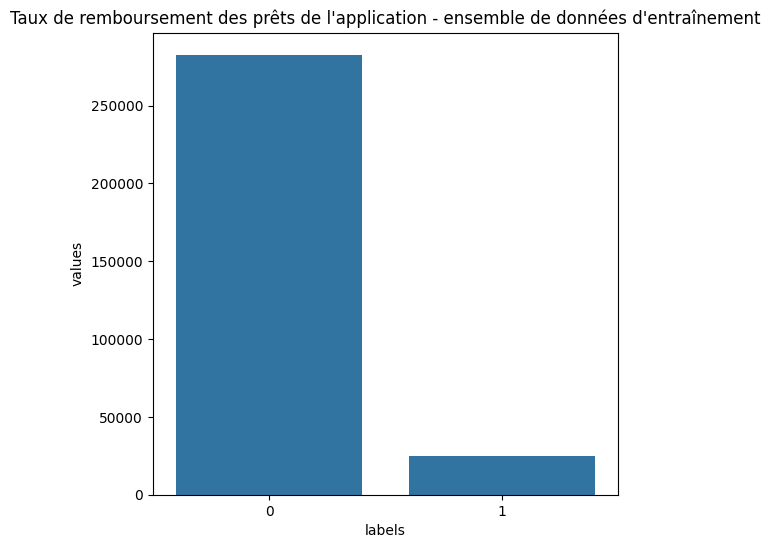

In [64]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title("Taux de remboursement des prêts de l'application - ensemble de données d'entraînement")
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


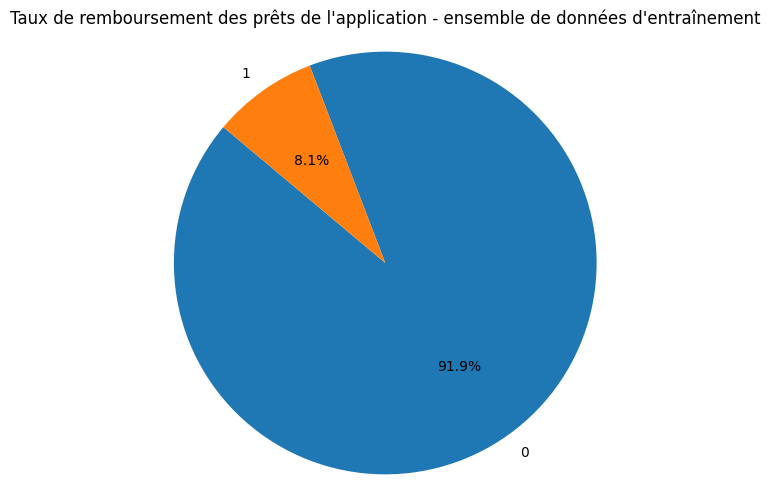

In [65]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

plt.figure(figsize=(6, 6))
plt.title("Taux de remboursement des prêts de l'application - ensemble de données d'entraînement")
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Assure que le camembert est un cercle.
plt.show()

### 4/ Analyse exploratoire

In [66]:
application_train.columns[0:80]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APART

In [67]:
application_train.columns[81:]

Index(['LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
    

#### A/ Application train - Etude des caractéristiques catégorielles

Pour chaque caractéristique étudiée, des graphiques qui étudient la distribution de la caractéristique et la relation avec la variable cible (remboursement du prêt) sont affichés. 

In [68]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    """
    Génère des graphiques pour analyser la distribution d'une caractéristique et la relation avec la variable cible.

    :param feature: La caractéristique à analyser.
    :param label_rotation: Rotation des étiquettes de l'axe des x.
    :param horizontal_layout: Si True, les graphiques sont disposés horizontalement, sinon verticalement.
    """
    # Compte le nombre de contrats par catégorie de la caractéristique
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Nombre de contrats': temp.values})

    # Calcule le pourcentage de TARGET=1 pour chaque valeur de catégorie
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14))
    
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x=feature, y="Nombre de contrats", data=df1)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    s = sns.barplot(ax=ax2, x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    
    plt.ylabel("Pourcentage de la cible avec la valeur 1 [%]", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

In [69]:
def plot_distribution(var):
    """
    Génère des graphiques de distribution pour différentes caractéristiques par rapport à la variable cible.

    :param var: Liste de caractéristiques à analyser.
    """
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))

    for feature in var:
        i += 1
        plt.subplot(2, 2, i)
        sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
        plt.ylabel('Graphique de densité', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

##### *Types de prêts des clients*

Les catégories de prêts contractés sont examinées, et un graphique affiche le pourcentage de prêts (en fonction de la catégorie de prêt) ayant une TARGET de 1 (ce qui signifie qu'un prêt n'a pas été remboursé).

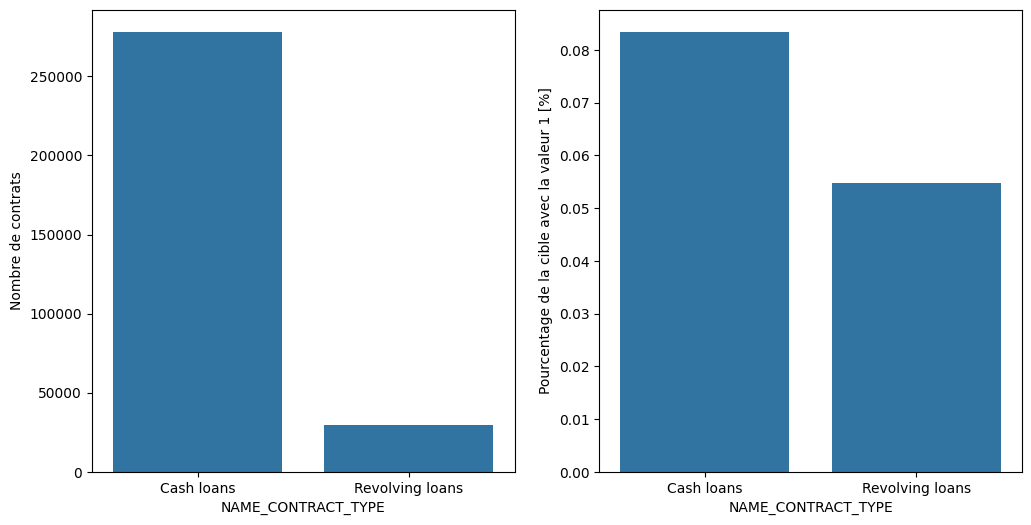

In [70]:
plot_stats('NAME_CONTRACT_TYPE')

Les prêts renouvelables ne représentent qu'une petite fraction (10 %) du nombre total de prêts. De plus, peu de prêts renouvelables (en comparaison avec leur fréquence) ne sont pas remboursés.

Prêts renouvelables : Un arrangement qui permet le retrait, le remboursement et le retrait à nouveau du montant du prêt de n'importe quelle manière et un nombre illimité de fois, jusqu'à l'expiration de l'arrangement. Les prêts de carte de crédit et les découverts bancaires sont des prêts renouvelables. On les appelle également des prêts perpétuels.

##### *Type d'accompagnement des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


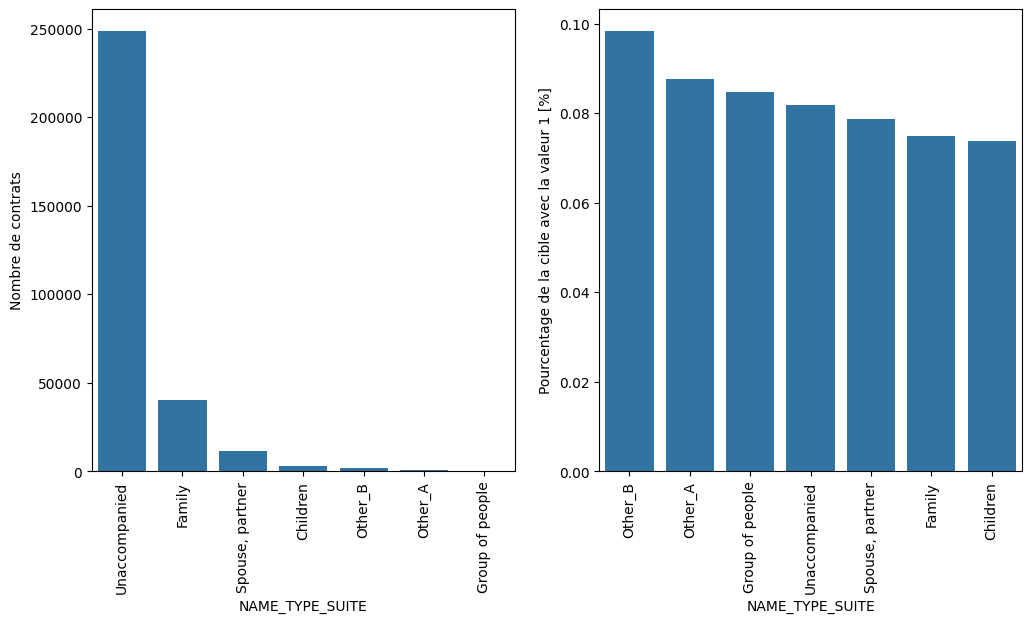

In [71]:
plot_stats('NAME_TYPE_SUITE',True, True)

En ce qui concerne le nombre de contrats, la catégorie "unaccompanied" est largement la plus fréquente.

En ce qui concerne les taux de non-remboursement, les catégories "Other_b" et "Other_A" ont des taux légèrement supérieurs à la moyenne, tandis que les catégories "family" et "children" ont des taux légèrement inférieurs à la moyenne.

##### *Genre des clients*

Il convient d'examiner le genre des clients ainsi que, sur un graphique distinct, le pourcentage des prêts (en fonction du genre du client) avec la valeur TARGET égale à 1 (prêt non remboursé).

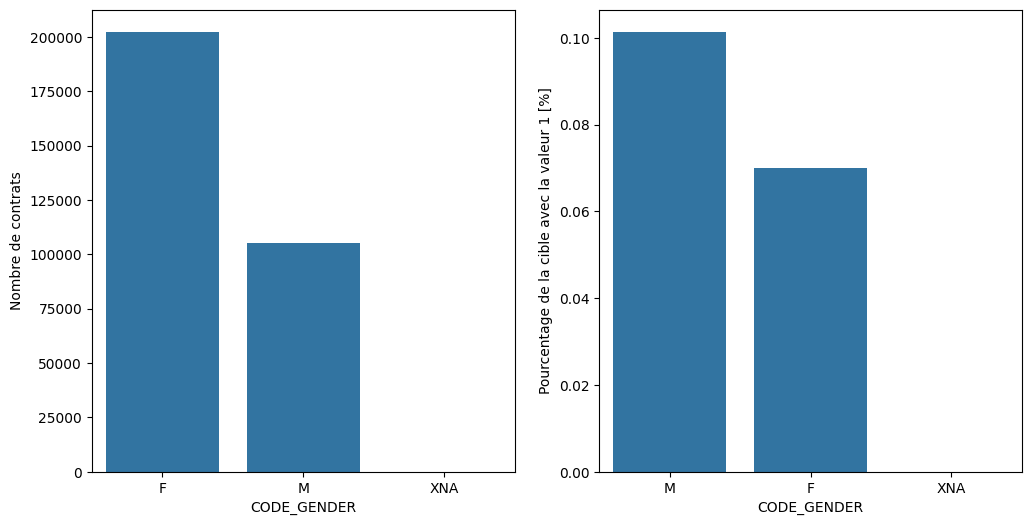

In [72]:
plot_stats('CODE_GENDER')

Le nombre de clientes est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en défaut, les hommes ont davantage de chances de ne pas rembourser leurs prêts (environ 10 %), comparativement aux femmes (environ 7 %).

##### *Indicateur de possession de voiture et Indicateur de possession de biens immobiliers des clients*

Les indicateurs de possession de voiture et de biens immobiliers sont examinées, et un graphique affiche le pourcentage de prêts (en fonction des indicateurs) ayant une TARGET de 1 (ce qui signifie qu'un prêt n'a pas été remboursé).

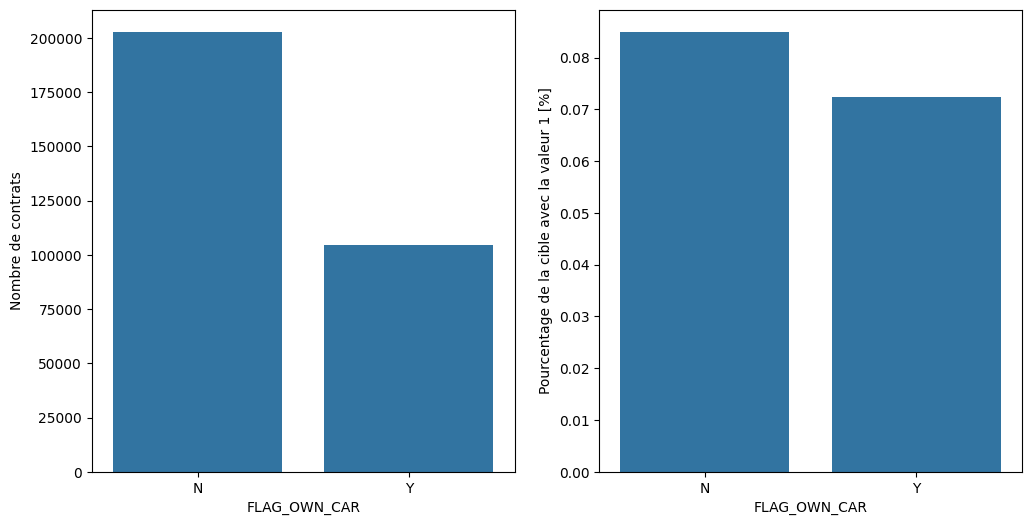

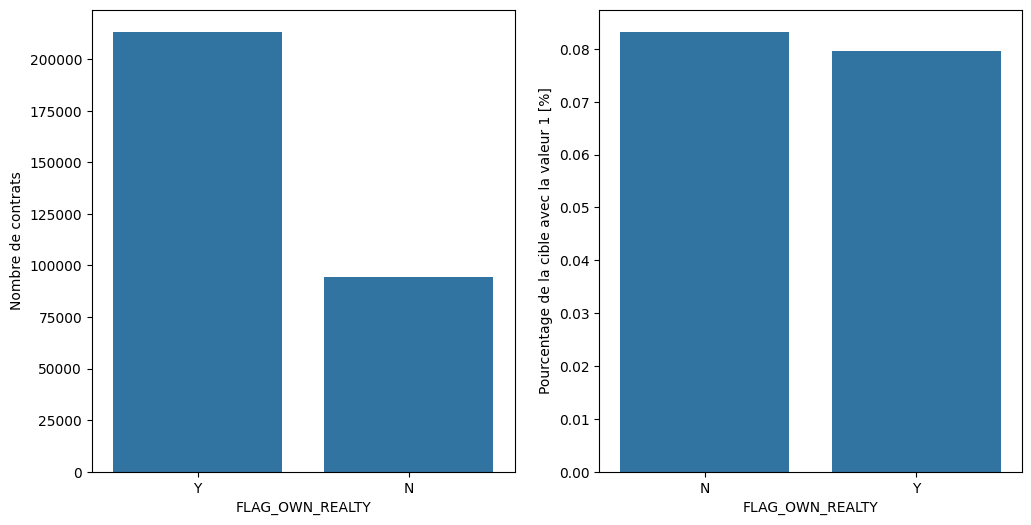

In [73]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

Les clients qui possèdent une voiture représentent presque la moitié de ceux qui n'en possèdent pas. Les clients propriétaires d'une voiture ont moins de risques de ne pas rembourser un prêt que ceux qui n'en possèdent pas. Les deux catégories ont des taux de non-remboursement d'environ 8%.

Les clients propriétaires de biens immobiliers sont plus du double de ceux qui n'en possèdent pas. Les deux catégories (propriétaires de biens immobiliers ou non propriétaires) ont des taux de non-remboursement inférieurs à 8%.

##### *Statut familial des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


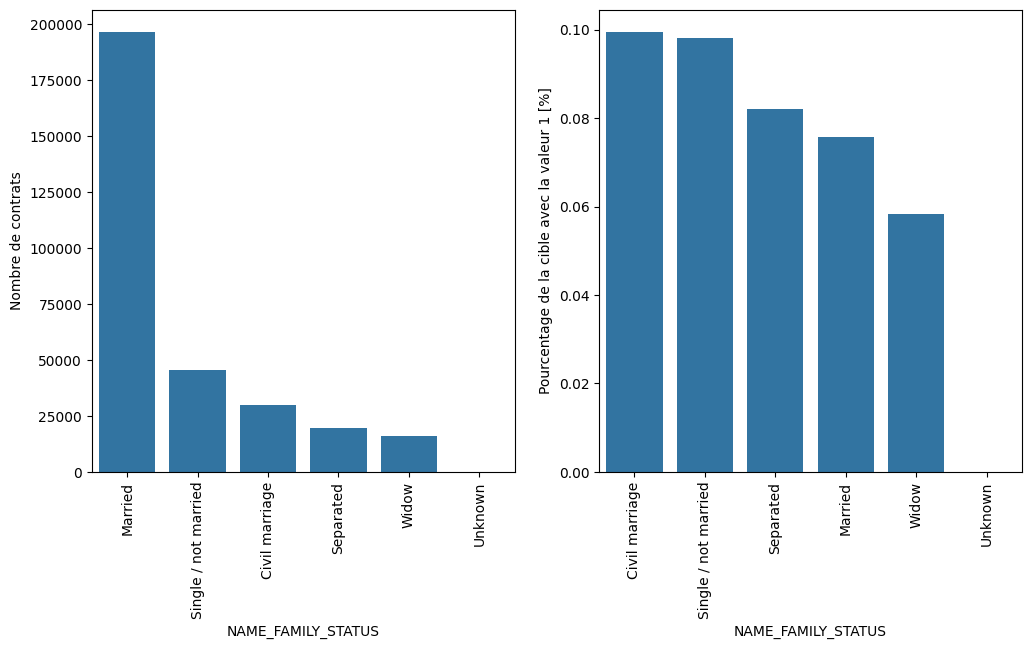

In [74]:
plot_stats('NAME_FAMILY_STATUS',True, True)

La plupart des clients sont mariés, suivis des célibataires ou non mariés et du mariage civil.

En termes de pourcentage de non-remboursement des prêts, le mariage civil a le pourcentage le plus élevé de non-remboursement (10 %), tandis que les veufs ont le pourcentage le plus bas (à l'exception des "Inconnus").

##### *Nombre d'enfants des clients*

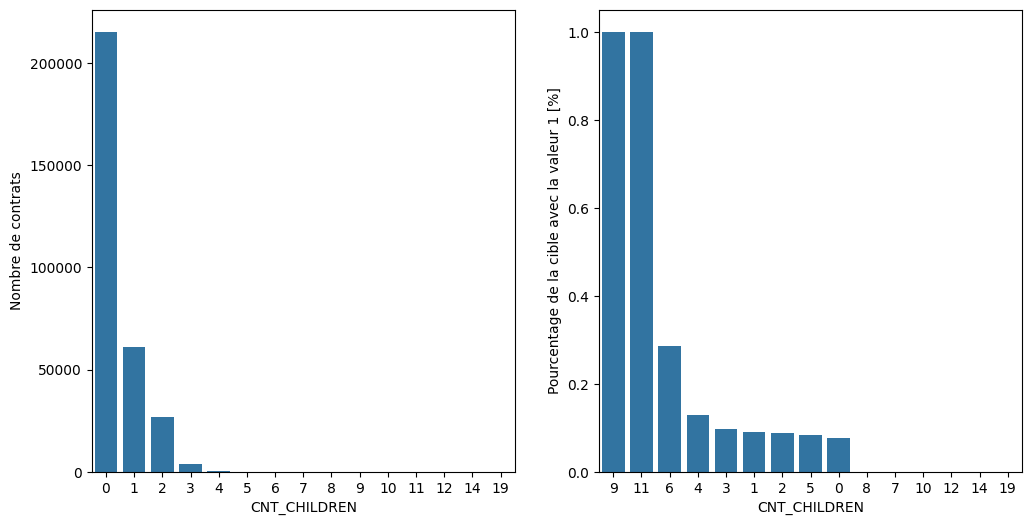

In [75]:
plot_stats('CNT_CHILDREN')

La plupart des clients qui contractent un prêt n'ont pas d'enfants. Le nombre de prêts associés aux clients ayant un enfant est 4 fois plus petit, le nombre de prêts associés aux clients ayant deux enfants est 8 fois plus petit ; les clients ayant 3, 4 ou plus d'enfants sont beaucoup plus rares.

En ce qui concerne le remboursement, les clients sans enfants, 1, 2, 3 et 5 enfants ont des pourcentages de non-remboursement proches de la moyenne (10 %). Les clients ayant 4 et 6 enfants ont un pourcentage de non-remboursement supérieur à la moyenne (plus de 25 % pour les familles ayant 6 enfants).

En ce qui concerne les clients ayant 9 ou 11 enfants, le pourcentage de prêts non remboursés est de 100 %. Pour autant il est à noter que peu de clients doivent avoir 9 ou 11 enfants.

##### *Nombre de membre de la famille des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


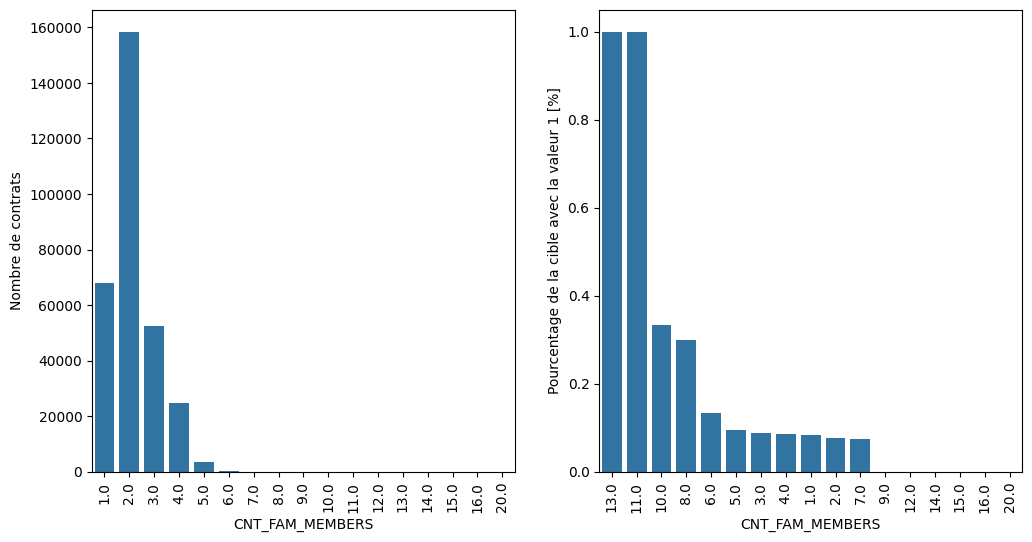

In [76]:
plot_stats('CNT_FAM_MEMBERS',True)

Les clients ayant 2 membres dans leur famille sont les plus nombreux, suivis par ceux ayant 1 membre (personnes seules), 3 (familles avec un enfant) et 4.

Les clients ayant une famille de 11 et 13 membres ont un taux de non-remboursement de 100%. Les autres familles composées de 10 ou 8 membres ont des pourcentages de non-remboursement de prêts de plus de 30%. Les familles de 6 membres ou moins ont des taux de remboursement proches de la moyenne de 10%.

##### *Type de revenu des clients*

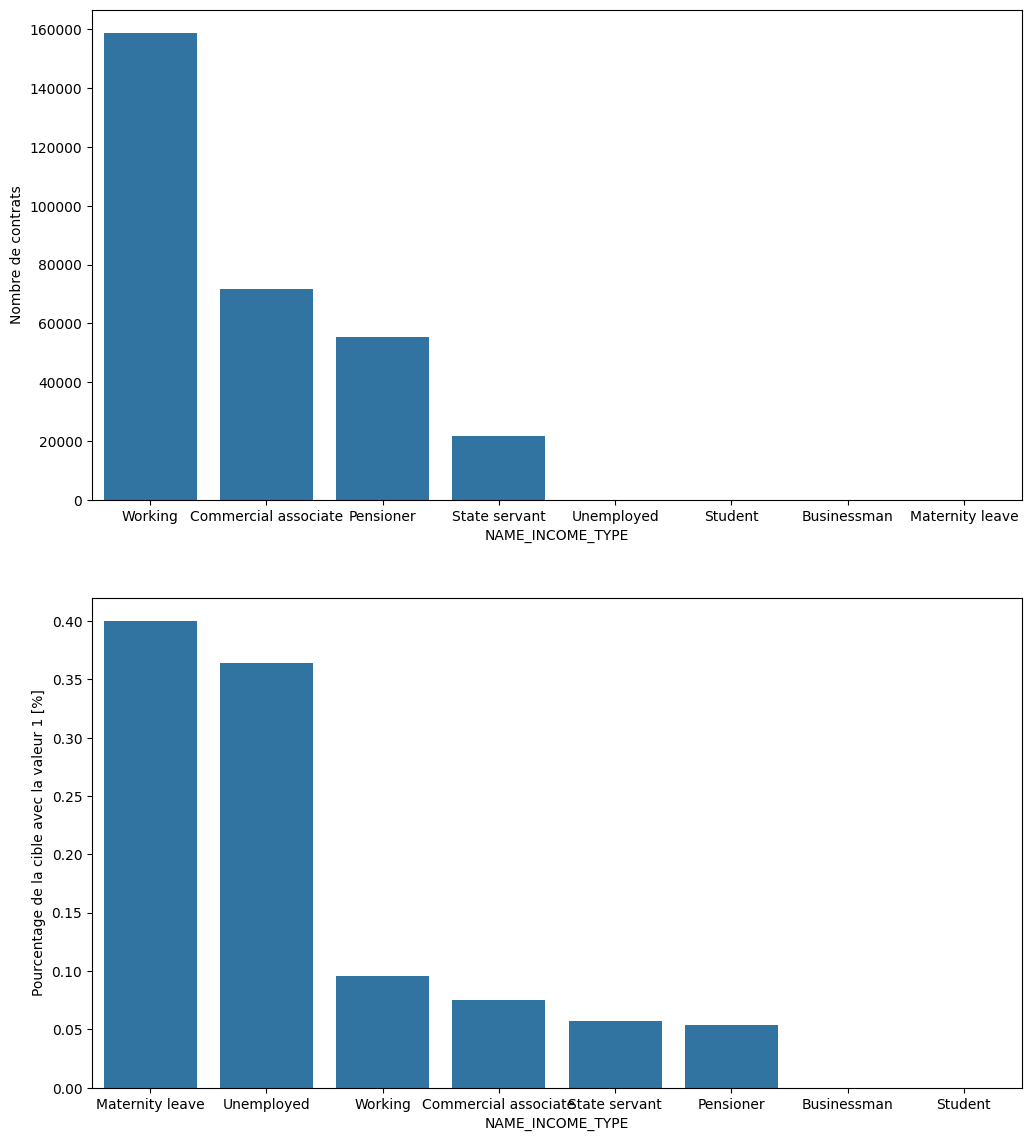

In [77]:
plot_stats('NAME_INCOME_TYPE',False,False)

La plupart des demandeurs de prêts ont des revenus provenant d'une activité professionnelle, suivis des associés commerciaux, des retraités et des fonctionnaires.

Les demandeurs ayant le type de revenu Congé de maternité ont presque un taux de 40% de non-remboursement de prêts, suivis par les chômeurs (37%). Les autres types de revenus se situent en dessous de la moyenne de 10% de non-remboursement de prêts.


##### *Type de travail des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


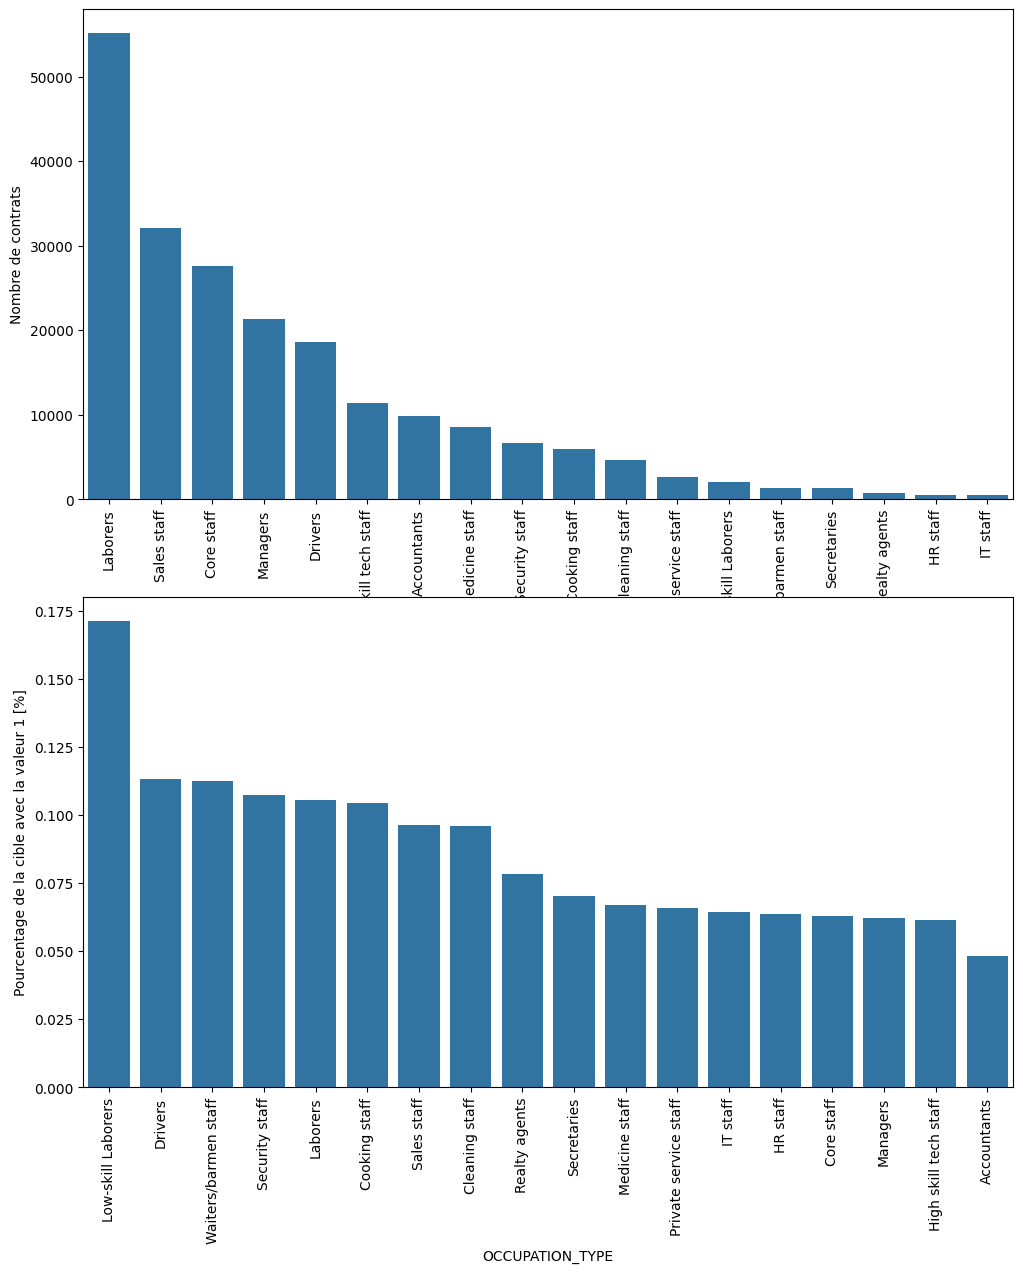

In [78]:
plot_stats('OCCUPATION_TYPE',True, False)

La plupart des prêts sont contractés par les "Ouvriers", suivis par le "Personnel de vente". Le "Personnel informatique" obtient le moins de prêts.

La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des "Ouvriers peu qualifiés" (plus de 17 %), suivie des "Chauffeurs" et du "Personnel des restaurants et des bars", du "Personnel de sécurité", des "Ouvriers" et du "Personnel de cuisine".

##### *Type d'entreprise des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


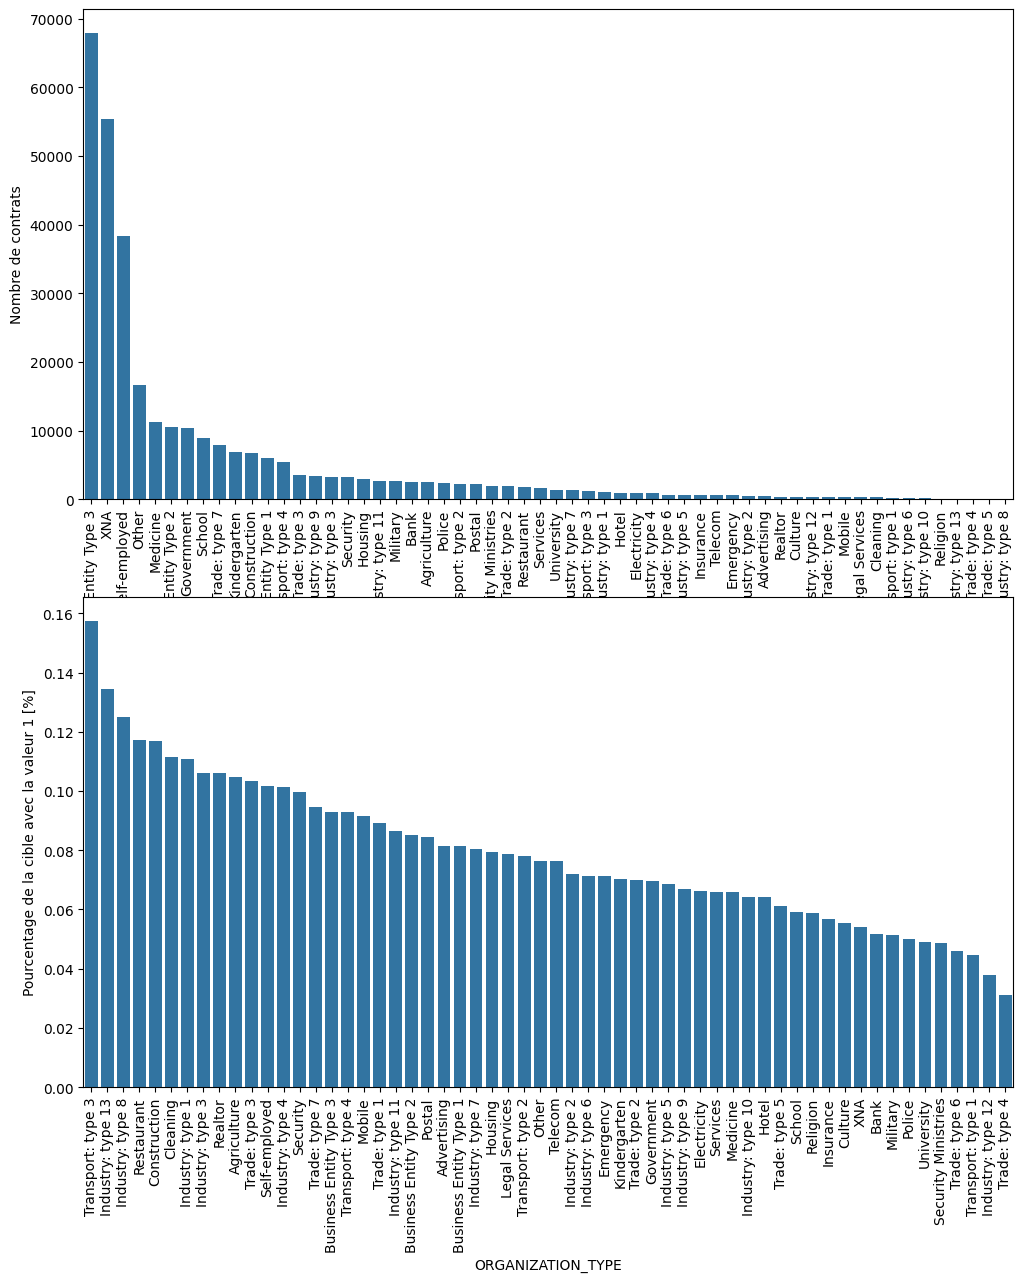

In [79]:
plot_stats('ORGANIZATION_TYPE',True, False)

Les organisations avec le pourcentage le plus élevé de prêts non remboursés sont Transport : type 3 (16 %), Industrie : type 13 (13,5 %), Industrie : type 8 (12,5 %) et les Restaurants (moins de 12 %).

##### *Niveau d'éduction des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


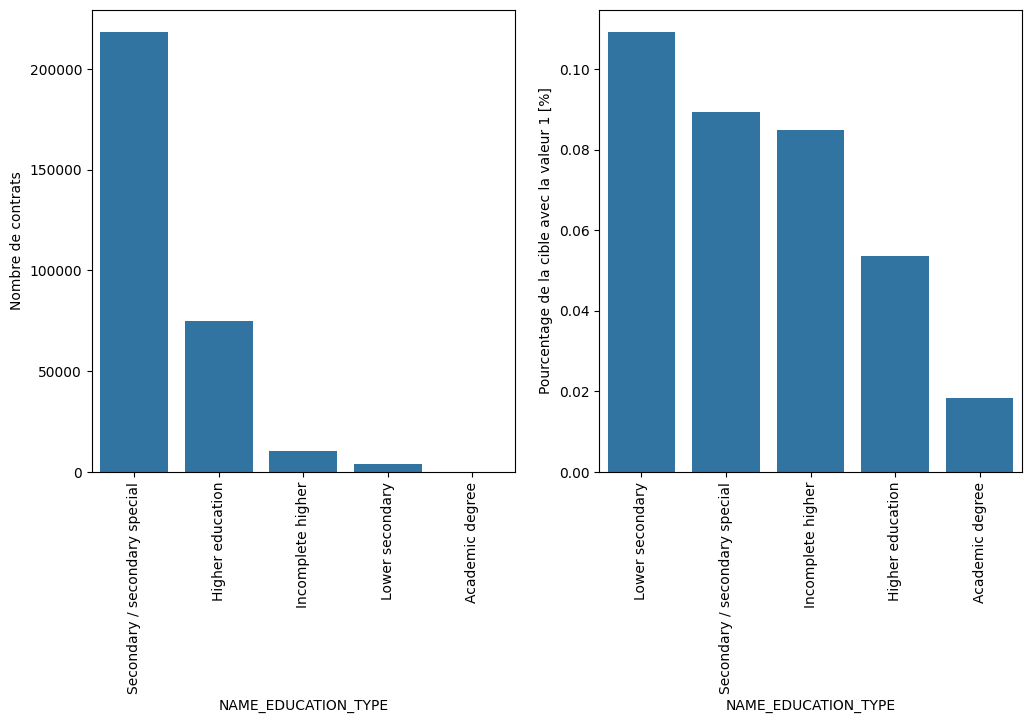

In [80]:
plot_stats('NAME_EDUCATION_TYPE',True)

La majorité des clients ont un niveau d'éducation secondaire / secondaire spécialisé, suivis des clients ayant un enseignement supérieur. Seul un très petit nombre possède un diplôme universitaire.

La catégorie de l'enseignement secondaire inférieur, bien que rare, présente le taux le plus élevé de non-remboursement du prêt (11 %). Les personnes titulaires d'un diplôme universitaire ont un taux de non-remboursement inférieur à 2 %.

##### *Type de logement des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3156014005.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


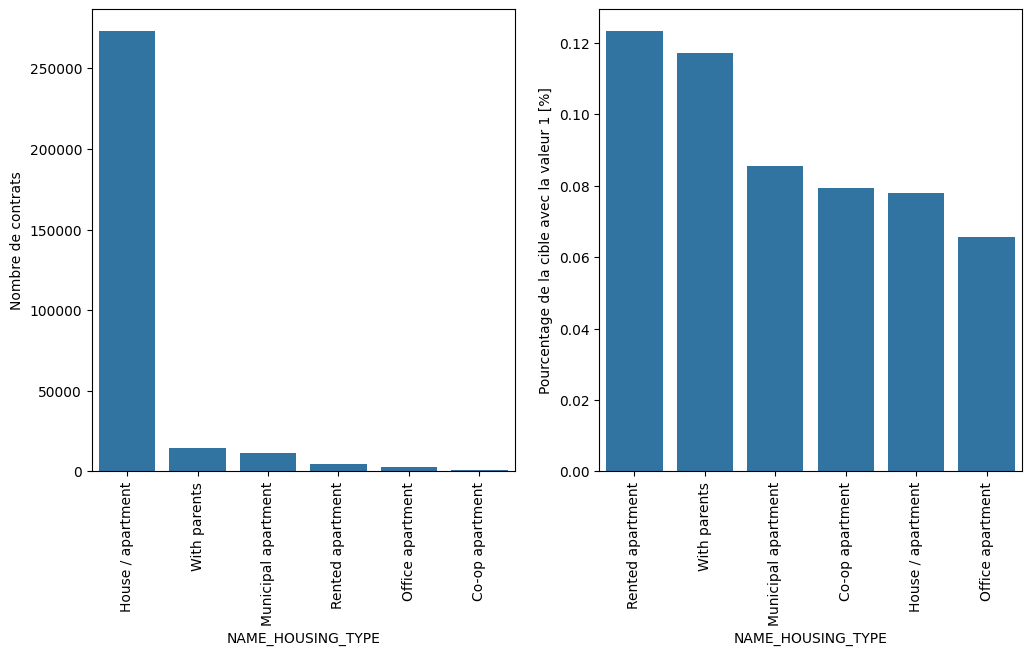

In [81]:
plot_stats('NAME_HOUSING_TYPE',True)

Plus de 250 000 demandeurs de crédit ont enregistré leur logement comme une maison/appartement. Les catégories suivantes comptent un très petit nombre de clients (Chez les parents, Appartement municipal).

Parmi ces catégories, les appartements loués et les clients vivant chez leurs parents ont un taux de non-remboursement supérieur à 10 %.

##### *Région d'inscription différente de la région de résidence et de la région de travail des clients*

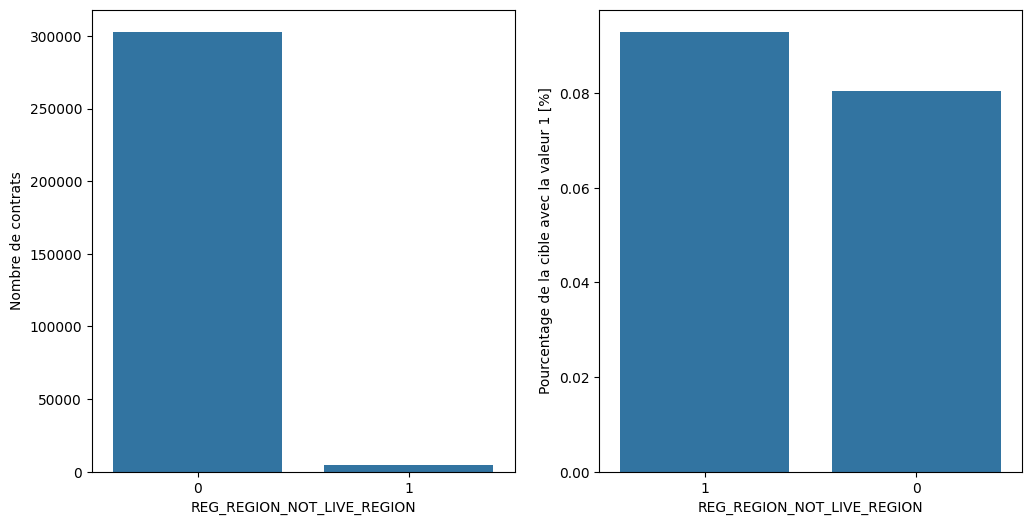

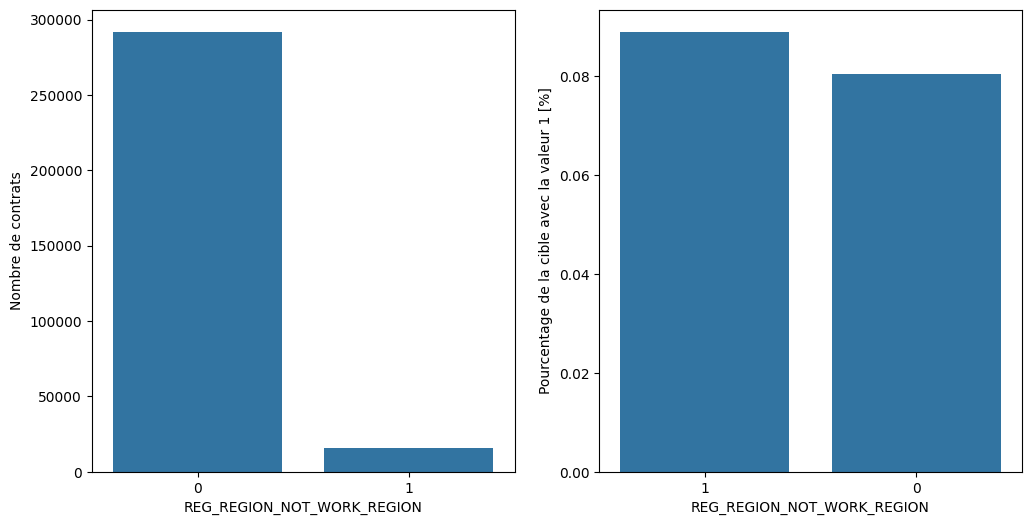

In [82]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Très peu de personnes sont enregistrées dans des régions où elles ne résident ni ne travaillent. En général, le taux de non-remboursement est légèrement plus élevé pour ces cas que dans le reste (légèrement supérieur à 8% par rapport à environ 8%).

##### *Ville d'inscription différente de la ville de résidence et de la ville de travail des clients*

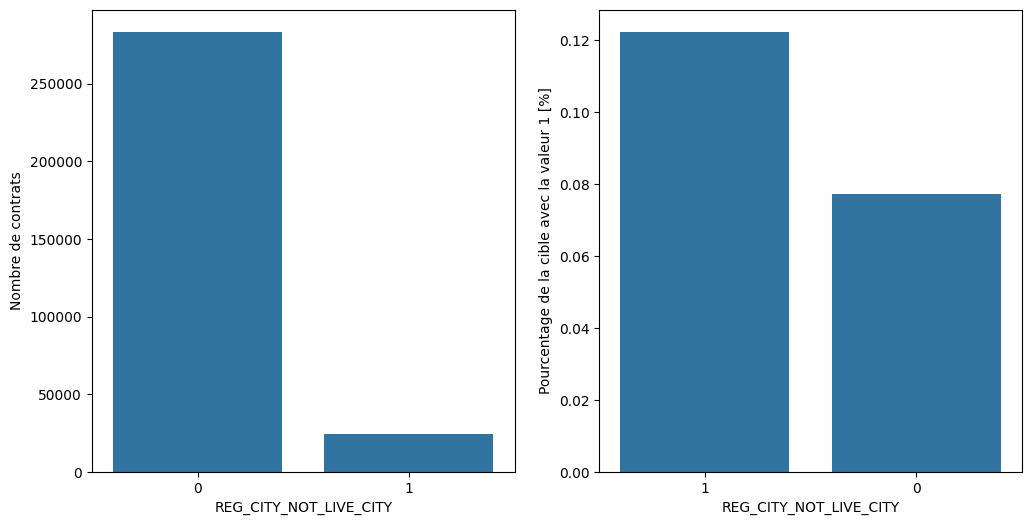

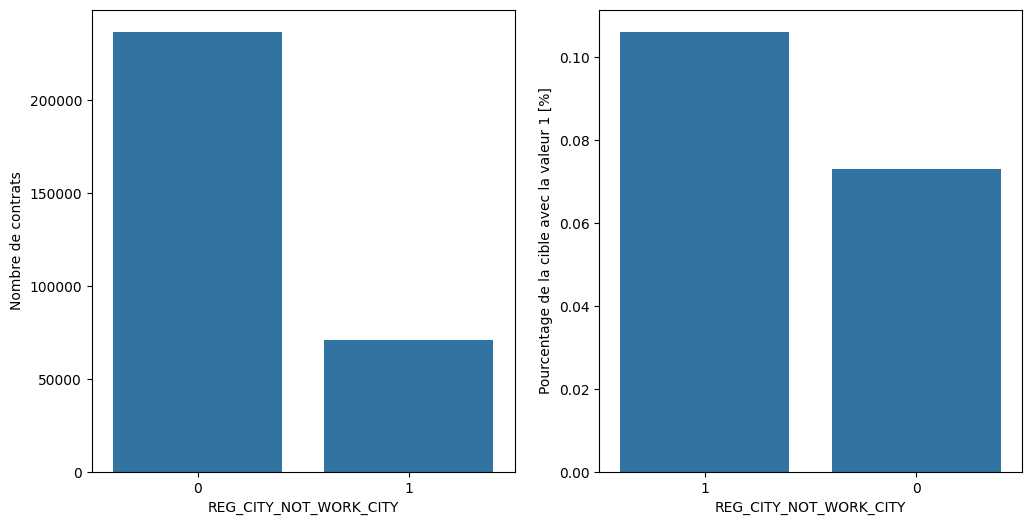

In [83]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')


En général, beaucoup plus de personnes s'enregistrent dans la ville où elles vivent ou travaillent (un plus grand nombre s'enregistre différemment pour la ville de travail que la ville de résidence).

Ceux qui s'enregistrent dans une ville différente de la ville de travail ou de la ville de résidence ont plus fréquemment des taux de non-remboursement des prêts que ceux qui s'enregistrent dans la même ville (11% pour la ville de travail ou 12% pour la ville de résidence).

#### B) Application train - Etude des caractéristiques numériques

In [84]:
# Fonction pour afficher la distribution d'une caractéristique
def plot_distribution(feature, color):
    """
    Affiche la distribution d'une caractéristique.

    Args:
        feature (str): Le nom de la caractéristique à afficher.
        color (str): La couleur de la distribution.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.title("Distribution de %s" % feature)
    sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)
    plt.show()


In [85]:
# Fonction pour afficher la distribution de plusieurs caractéristiques avec TARGET = 1/0 sur le même graphique
def plot_distribution_comp(var, nrow=2):
    """
    Affiche la distribution de plusieurs caractéristiques avec TARGET = 1/0 sur le même graphique.

    Args:
        var (list): Liste des caractéristiques à afficher.
        nrow (int): Nombre de lignes dans le graphique.

    Returns:
        None
    """
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow, 2, figsize=(12, 6 * nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow, 2, i)
        sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
        plt.ylabel('Dénsité plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.legend()
    plt.show()


##### *Revenu total des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/261674717.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)


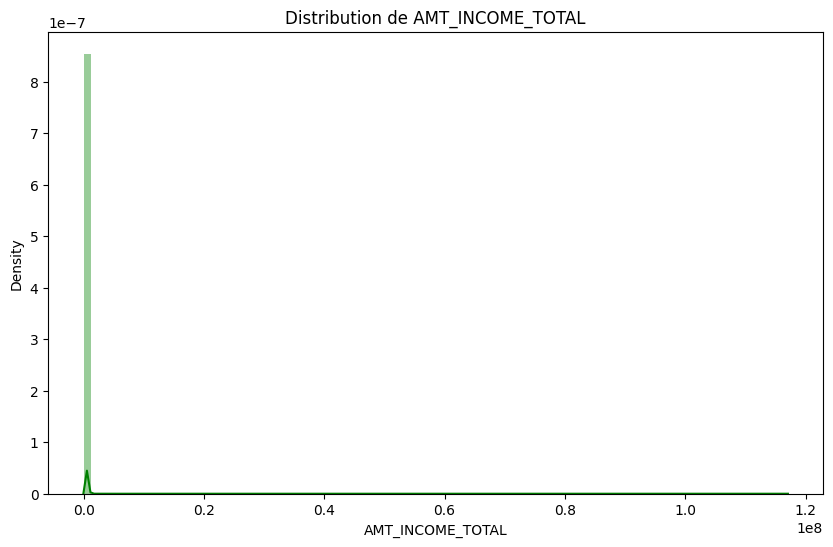

In [86]:
plot_distribution('AMT_INCOME_TOTAL','green')


##### *Valeur du crédit*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/261674717.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)


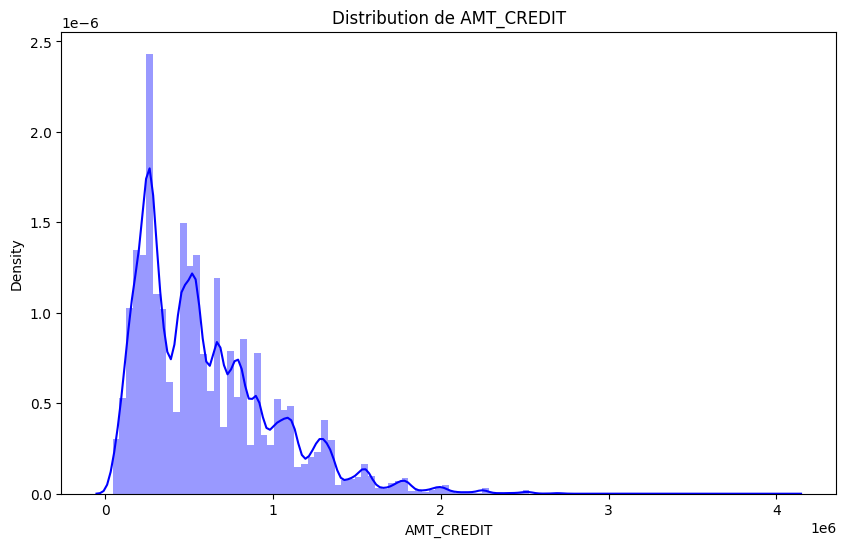

In [87]:
plot_distribution('AMT_CREDIT','blue')

##### *Nombre d'annuités*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/261674717.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)


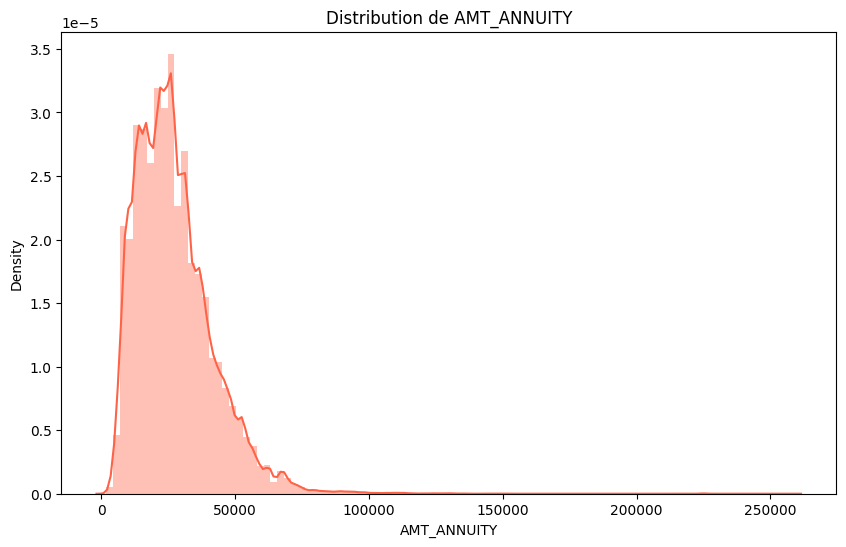

In [88]:
plot_distribution('AMT_ANNUITY','tomato')

##### *Biens des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/261674717.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)


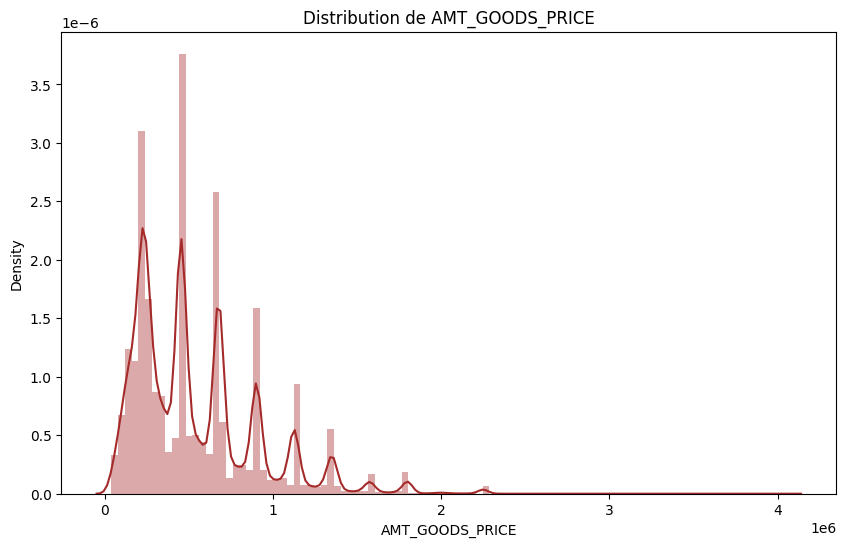

In [89]:
plot_distribution('AMT_GOODS_PRICE','brown')

##### *Jours de cients depuis la naissance (âge)*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/261674717.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)


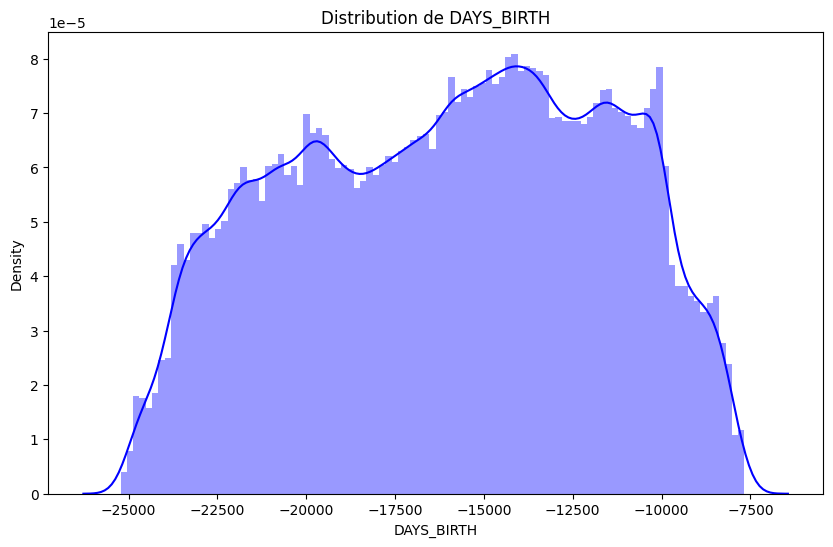

In [90]:
plot_distribution('DAYS_BIRTH','blue')

La valeur négative signifie que la date de naissance est dans le passé. La plage d'âge se situe entre environ 20 et 68 ans.

##### *Nombre de jours travaillées*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/261674717.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)


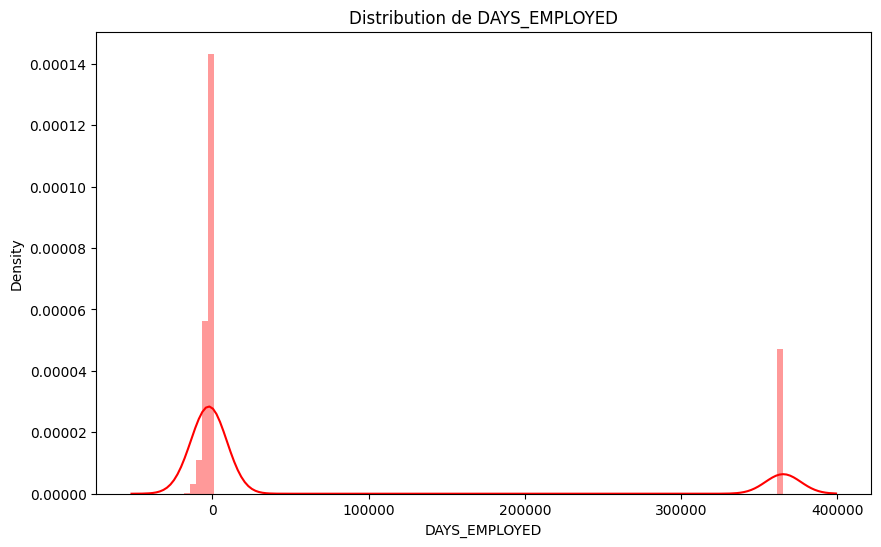

In [91]:
plot_distribution('DAYS_EMPLOYED','red')

Les valeurs négatives signifient "Jours depuis l'emploi" et correspondent très probablement aux personnes au chômage. 
Il n'est pas clair quelle serait la signification des très grandes valeurs à l'extrémité à droite (il n'est pas réaliste qu'un grand nombre de personnes soient employées depuis plus de 100 ans).

##### *Jours depuis l'enregistrement*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/261674717.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)


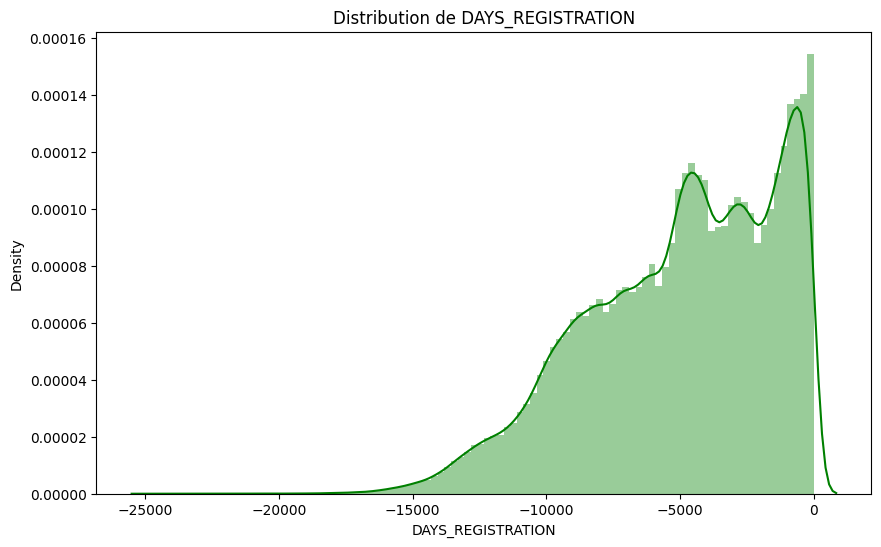

In [92]:
plot_distribution('DAYS_REGISTRATION','green')

##### *Jours depuis la publication de l'ID*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/261674717.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)


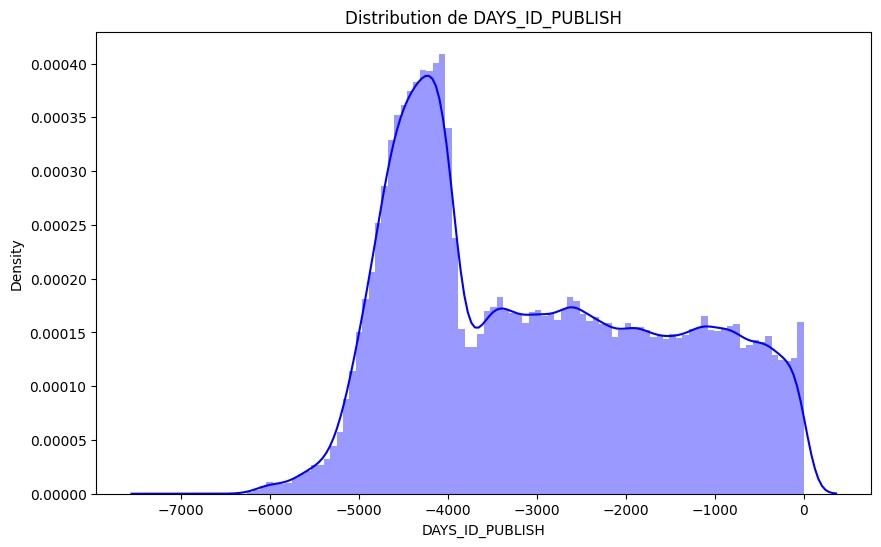

In [93]:
plot_distribution('DAYS_ID_PUBLISH','blue')

##### *Comparaison des distributions des caractéristiques en fonction des valeurs de la target*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/1570409968.py:24: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/1570409968.py:25: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/1570409968.py:24: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code

<Figure size 640x480 with 0 Axes>

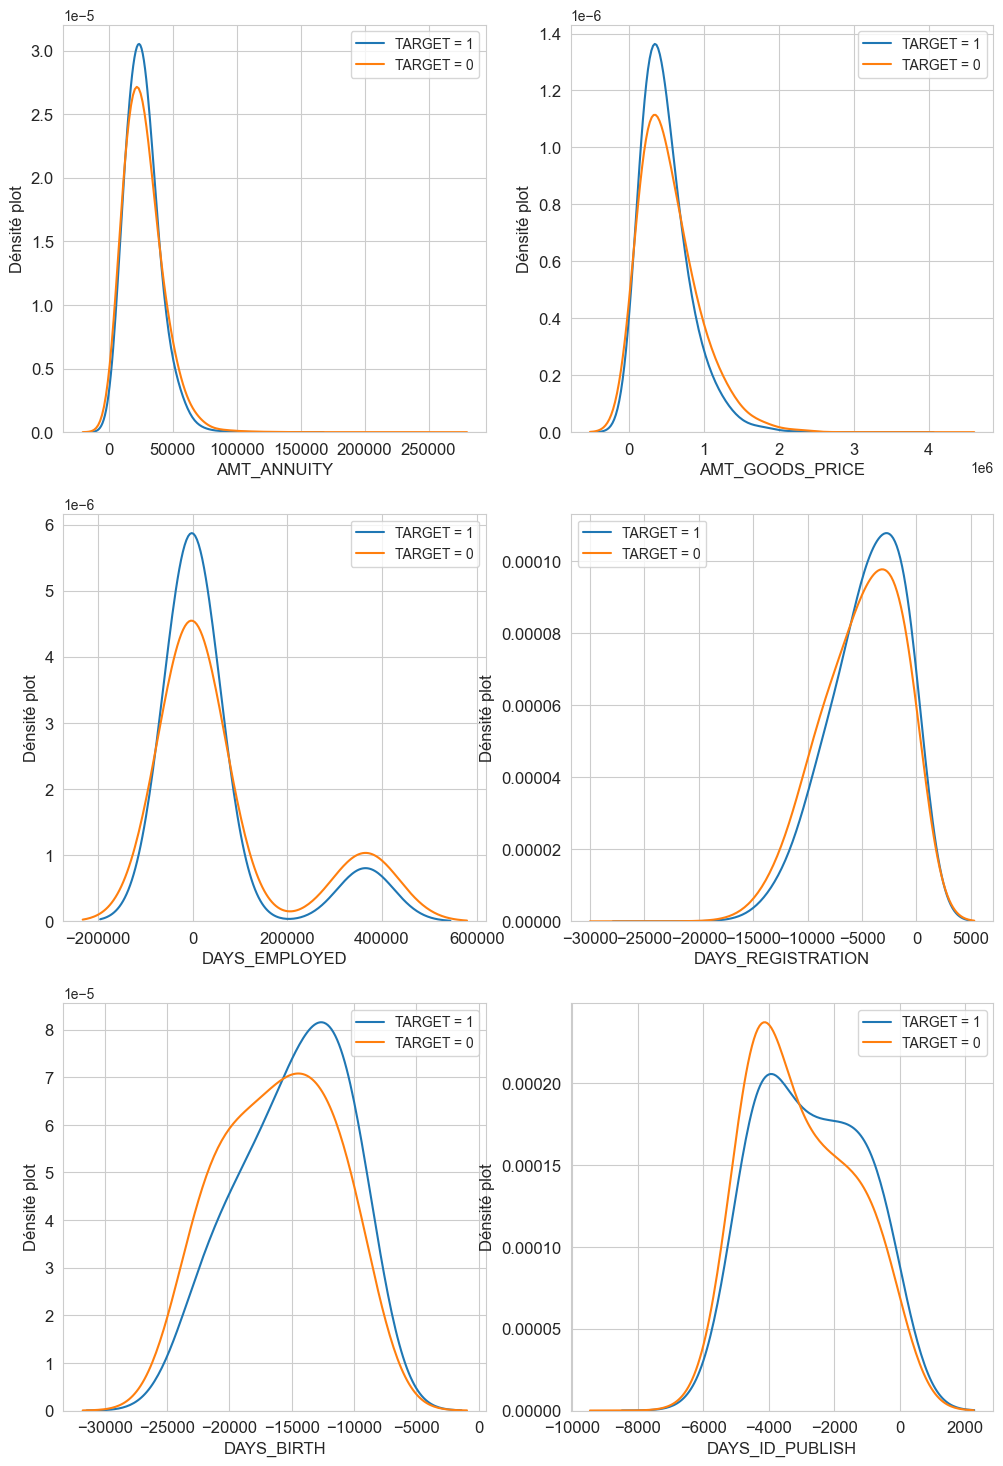

In [94]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

#### C) Bureau - Etude des caractéristiques catégorielles

Les données du DataSet "Bureau" contiennent tous les prêts précédents des clients fournis par d'autres institutions financières qui ont été signalés au Bureau de crédit (pour les clients ayant un prêt dans l'échantillon). Pour chaque prêt de l'échantillon, il y a autant de lignes que de prêts que le client avait au Bureau de crédit avant la date de la demande. 'SK_ID_CURR' est la clé reliant les données application_train|test aux données du bureau.

Les deux dataframes sont combinés puis le résultat est analysé.


In [95]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [96]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [97]:
print("Le dataframe résultant 'application_bureau_train' a ", application_bureau_train.shape[0], " lignes et ",
application_bureau_train.shape[1], " colonnes.")

Le dataframe résultant 'application_bureau_train' a  1465325  lignes et  138  colonnes.


In [98]:
def plot_b_stats(feature, label_rotation=False, horizontal_layout=True):
    """
    Affiche les statistiques d'une caractéristique spécifique en fonction de la cible (TARGET) dans les données fusionnées.

    Args:
        feature (str): Nom de la caractéristique à analyser.
        label_rotation (bool, optional): Rotation des étiquettes sur l'axe des x. Par défaut, False.
        horizontal_layout (bool, optional): True pour afficher les graphiques en disposition horizontale, False pour une disposition verticale. Par défaut, True.

    Returns:
        None
    """
    temp = application_bureau_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Nombre de contrats': temp.values})

    # Calcul du pourcentage de TARGET=1 pour chaque valeur de catégorie
    cat_perc = application_bureau_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x=feature, y="Nombre de contrats", data=df1)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    s = sns.barplot(ax=ax2, x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel('Pourcentage de la cible avec la valeur 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()



##### *Statut des crédits des clients*

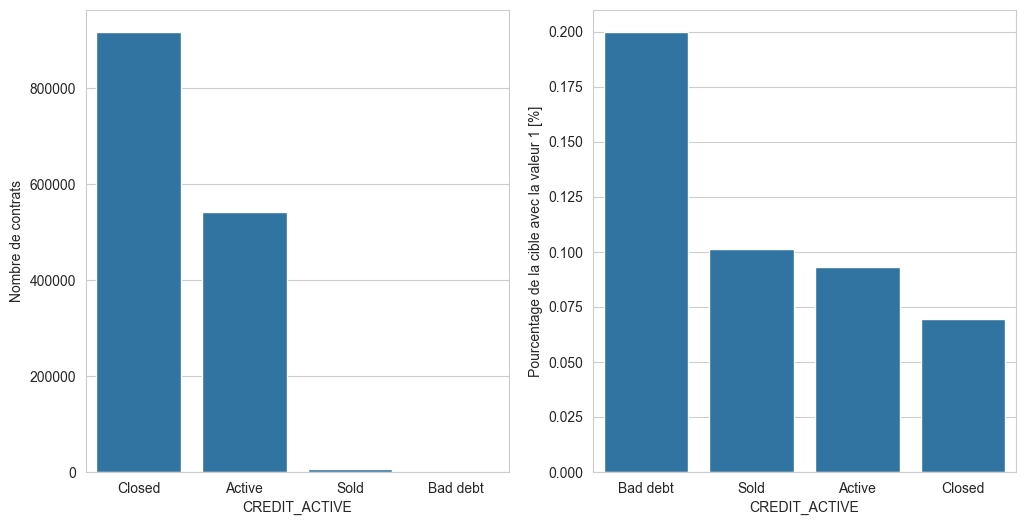

In [99]:
plot_b_stats('CREDIT_ACTIVE')

La grande majorité des crédits enregistrés au Bureau de crédit sont clôturés, totalisant près de 900 000 cas. En deuxième position, on trouve les crédits actifs, qui s'élèvent à un peu moins de 600 000. Les crédits vendus et les cas de mauvaise dette sont relativement rares en comparaison.

Cependant, en ce qui concerne le pourcentage de crédits avec la valeur TARGET = 1 par rapport au nombre total de chaque catégorie, les clients ayant des antécédents de crédit au Bureau de crédit avec le statut "Mauvaise dette" présentent un taux de défaut de 20 % sur les demandes de crédit actuelles.

Pour les clients ayant des crédits "Vendus", "Actifs" et "Clôturés", le pourcentage de TARGET == 1 (crédits en défaut) est égal ou inférieur à 10 %, ce qui correspond au taux moyen global. Le taux le plus bas de crédits en défaut concerne les clients dont les crédits au Bureau de crédit sont clôturés.

Cela indique que l'historique des crédits antérieurs enregistrés au Bureau de crédit constitue un indicateur significatif du risque de crédit, étant donné que le pourcentage de demandes de crédit en défaut associées à un historique de "Mauvaise dette" est deux fois plus élevé que celui des crédits "Vendus" ou "Actifs" et presque trois fois plus élevé que celui des crédits "Clôturés".

##### *Devise des crédits*

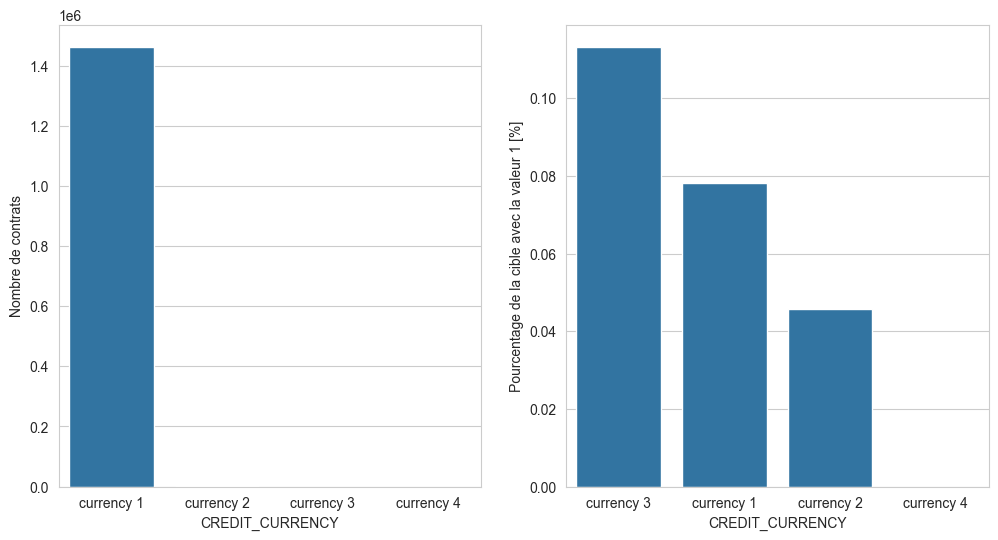

In [100]:
plot_b_stats('CREDIT_CURRENCY')

La majorité des crédits sont dans 'currency_1'.

Le pourcentage de clients en défaut varie considérablement en fonction de la devise. En commençant par 'currency_3', puis c'urrency_1' et 'currency_2', le pourcentage de clients en défaut est respectivement de 11 %, 8 % et 5 %. Le pourcentage de demandes en défaut pour les clients ayant des crédits enregistrés en currency_4 est proche de 0 %.

Il est donc clair que la devise utilisée pour les crédits précédemment enregistrés est un indicateur important du risque de défaut de crédit. Cela peut être dû à des variations dans les conditions économiques ou à d'autres facteurs spécifiques à chaque devise.

##### *Type de crédits des clients*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/2934303092.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/2934303092.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


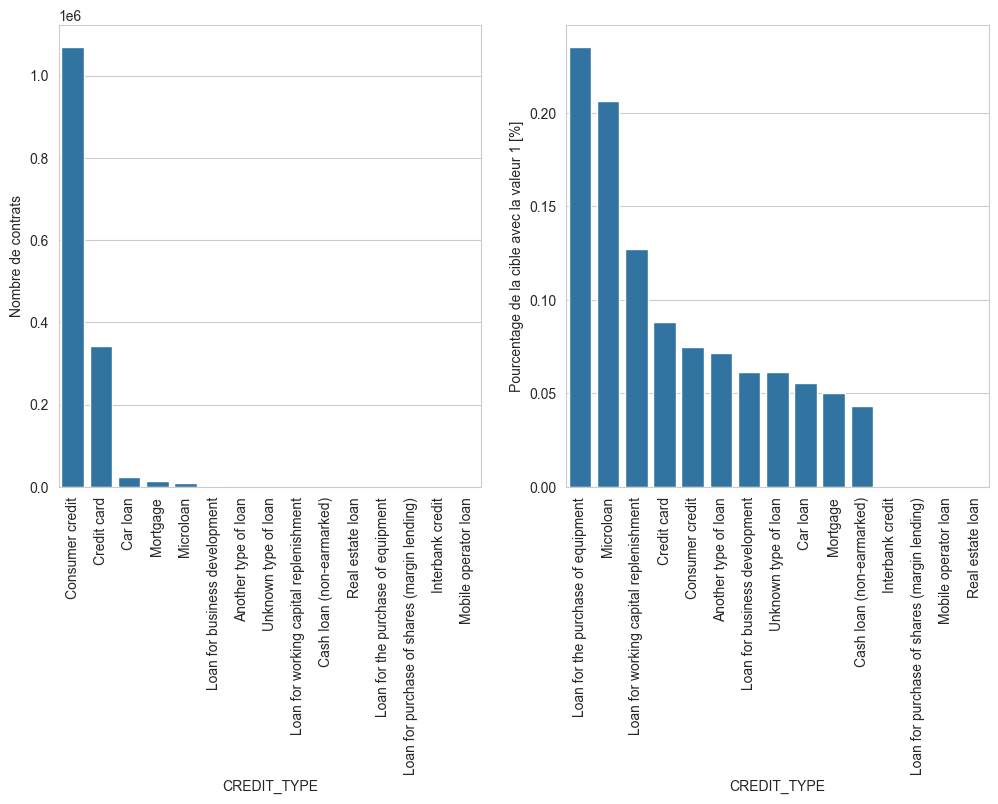

In [101]:
plot_b_stats('CREDIT_TYPE', True, True)

La majorité des crédits historiques enregistrés au Bureau de crédit sont de type Crédit à la consommation et Carte de crédit. Il y a un nombre moins élevé de crédits de type Prêt auto, Prêt hypothécaire et Microcrédit.

En examinant maintenant les types de crédits historiques enregistrés au Bureau de crédit, on remarque que quelques-uns présentent un taux élevé de défaut de crédit actuel, comme suit :

Prêt pour l'achat d'équipements - avec plus de 20 % de défauts de crédit actuels ;
Microcrédit - avec plus de 20 % de défauts de crédit actuels ;
Prêt pour le renflouement du capital de travail - avec plus de 12 % de défauts de crédit actuels.
Ces catégories de crédits historiques présentent des risques plus élevés de défaut de crédit pour les demandes de crédit actuelles.

#### D) Bureau - Etude des caractéristiques numériques

In [102]:
def plot_b_distribution(feature, color):
    """
    Affiche la distribution d'une caractéristique de l'ensemble de données de crédits précédents enregistrés au Bureau.

    Args:
        feature (str): Nom de la caractéristique à afficher.
        color (str): Couleur du graphique.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.title("Distribution de %s" % feature)
    sns.distplot(application_bureau_train[feature].dropna(), color=color, kde=True, bins=100)
    plt.show()

##### *Durée du crédit*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/2525459621.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(), color=color, kde=True, bins=100)


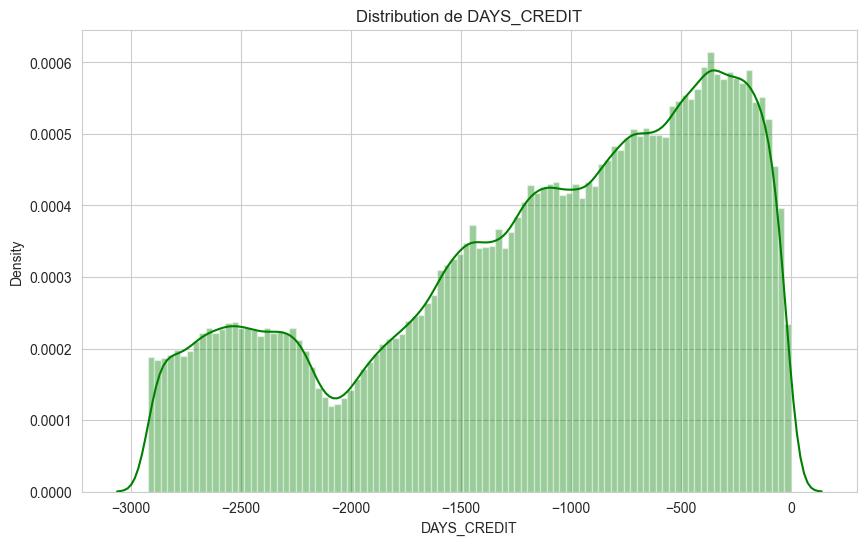

In [103]:
plot_b_distribution('DAYS_CREDIT','green')

La période de remboursement des crédits, mesurée en jours, se situe dans une fourchette allant de moins de 3000 jours (avec un creux remarqué autour de 2000 jours) à une fréquence croissante pour des durées plus courtes, atteignant un sommet autour de 300 jours (soit moins d'un an).

##### *Jours de retard du crédit*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/2525459621.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(), color=color, kde=True, bins=100)


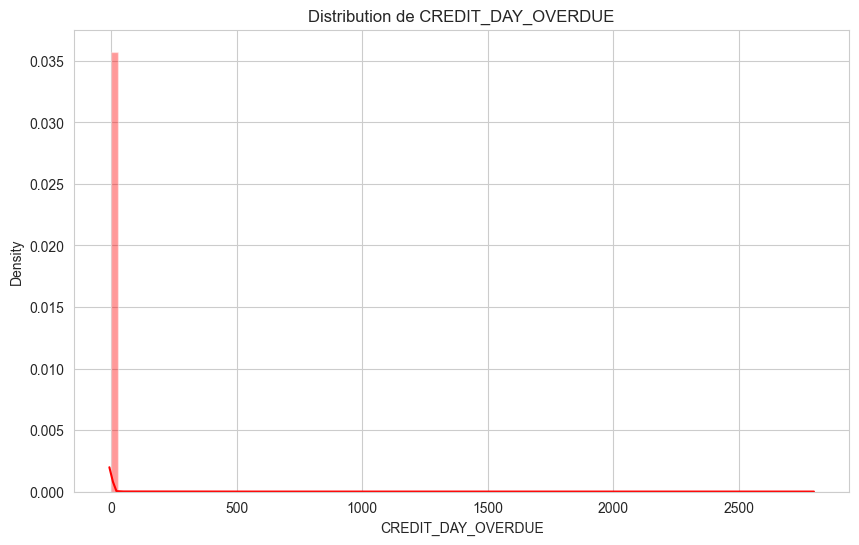

In [104]:
plot_b_distribution('CREDIT_DAY_OVERDUE','red')


La plupart des crédits ont 0 jours de retard ou un retard proche de 0. Le nombre maximum de jours de retard de crédit est d'environ 3000 jours.

##### *Montant total du crédit*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/2525459621.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(), color=color, kde=True, bins=100)


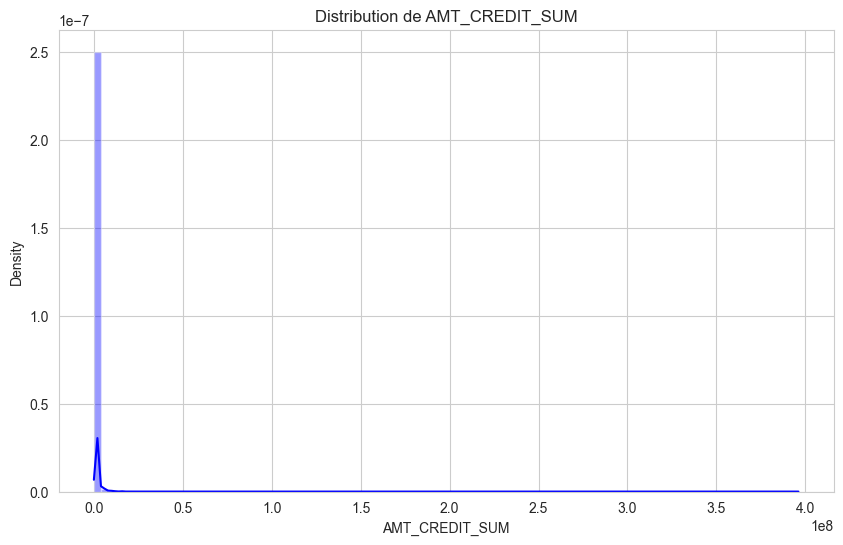

In [105]:
plot_b_distribution('AMT_CREDIT_SUM','blue')


La distribution de la caractéristique 'AMT_CREDIT_SUM' révèle une concentration des prêts dans la plage des montants de crédit les plus bas. Pour une analyse plus approfondie de ces valeurs, nous allons procéder de la manière suivante :
- Élimination des valeurs aberrantes : Nous allons introduire une fonction permettant d'identifier et de filtrer les valeurs aberrantes en utilisant un seuil préalablement défini. Cela nous permettra d'améliorer la lisibilité de la distribution en éliminant les valeurs extrêmes.
- Affichage de la distribution : Ensuite, nous allons adapter notre fonction pour afficher la distribution de la caractéristique 'AMT_CREDIT_SUM' en utilisant la fonction de filtrage des valeurs aberrantes que nous avons créée. Cette approche nous permettra d'observer la distribution plus clairement, en mettant en évidence la répartition des valeurs autour de zéro.

In [106]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting (see references)

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:, None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh


/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/2525459621.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(), color=color, kde=True, bins=100)


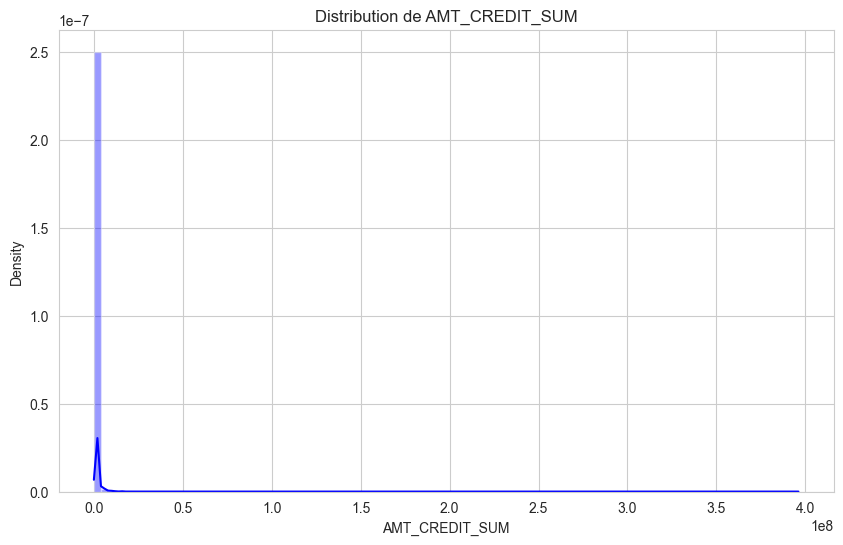

In [107]:
# Assuming 'AMT_CREDIT_SUM' is a column in a Pandas DataFrame
feature = 'AMT_CREDIT_SUM'
x = application_bureau_train[feature].dropna().values  # Convert to a NumPy array

filtered = x[~is_outlier(x)]
plot_b_distribution('AMT_CREDIT_SUM','blue')  # Use the correct function name

We can observe that the distribution function shows several peaks and the maximum concentration of the values is around 20,000 but we also see several other peaks at higher values.

##### *Limite du montant de crédit*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/2525459621.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_bureau_train[feature].dropna(), color=color, kde=True, bins=100)


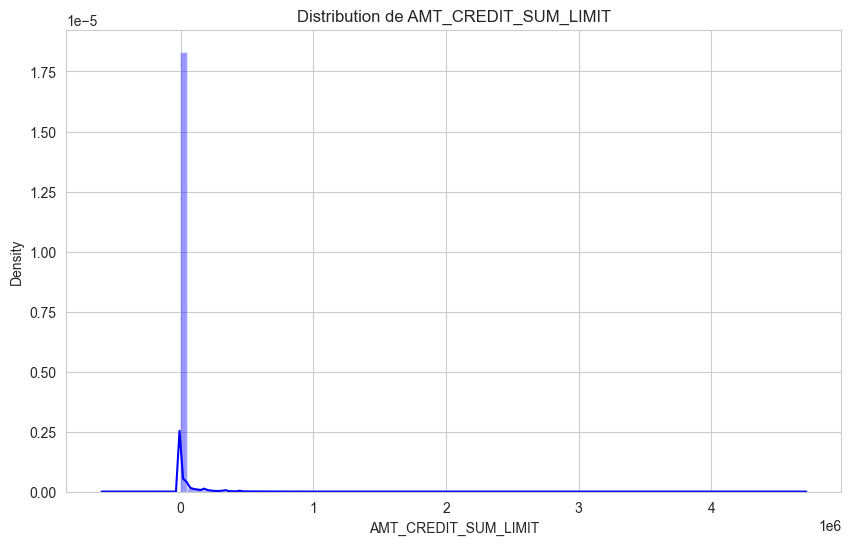

In [108]:
plot_b_distribution('AMT_CREDIT_SUM_LIMIT','blue')

##### *Comparaison des distributions des caractéristiques en fonction des valeurs de la target*

In [109]:
# Trace la distribution de plusieurs caractéristiques, en distinguant entre TARGET = 1 et TARGET = 0, sur le même graphique.
def plot_b_distribution_comp(caracteristiques, nrow=2):
    """
    Tracez la distribution de plusieurs caractéristiques avec deux sous-graphiques pour chaque caractéristique,
    un pour TARGET = 1 et un autre pour TARGET = 0, sur le même graphique.

    Args:
        caracteristiques (liste): Une liste de noms de caractéristiques à visualiser.
        nrow (int, optionnel): Nombre de lignes pour les sous-graphiques. Par défaut, c'est 2.

    Returns:
        None
    """
    i = 0
    t1 = application_bureau_train.loc[application_bureau_train['TARGET'] != 0]
    t0 = application_bureau_train.loc[application_bureau_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow, 2, figsize=(12, 6 * nrow))

    for caractéristique in caracteristiques:
        i += 1
        plt.subplot(nrow, 2, i)
        sns.kdeplot(t1[caractéristique], bw=0.5, label="TARGET = 1")
        sns.kdeplot(t0[caractéristique], bw=0.5, label="TARGET = 0")
        plt.ylabel('Graphique de densité', fontsize=12)
        plt.xlabel(caractéristique, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.legend()

    plt.show()

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/539224807.py:25: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[caractéristique], bw=0.5, label="TARGET = 1")
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/539224807.py:26: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[caractéristique], bw=0.5, label="TARGET = 0")
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/539224807.py:25: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and upd

<Figure size 640x480 with 0 Axes>

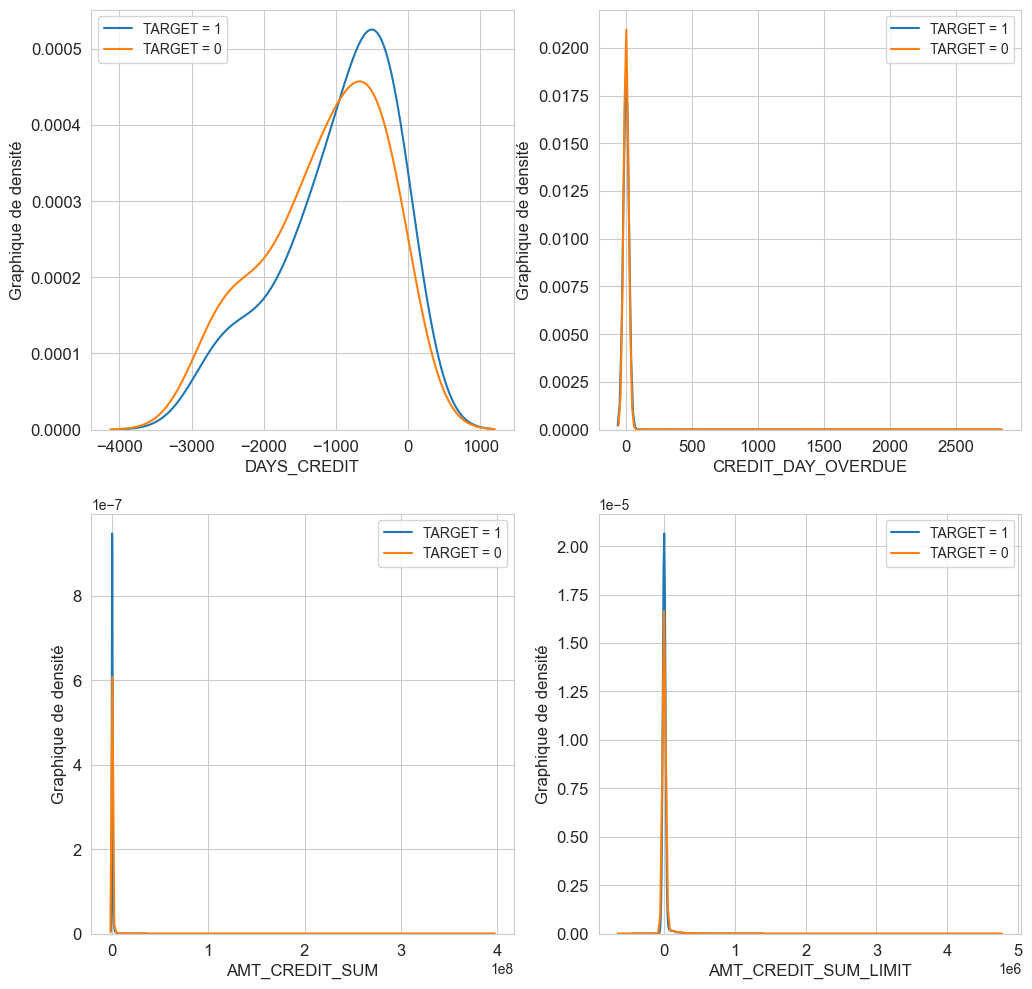

In [110]:
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']

plot_b_distribution_comp(var, nrow=2)

#### E) Previous application - Etude des caractéristiques catégorielles

Le DataFrame *previous_application* contient des informations sur toutes les applications précédentes pour les prêts des clients ayant des prêts dans l'échantillon de données. Il y a une ligne pour chaque demande précédente liée aux prêts de notre échantillon de données. **SK_ID_CURR** est la clé qui relie les données de *application_train* aux données de *previous_application*.

Les dataframes *application_train* avec *previous_application* sont combinées.

In [111]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [112]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [113]:
print("Le DataFrame résultant 'application_prev_train' a ", application_prev_train.shape[0], " lignes et ", 
      application_prev_train.shape[1], " colonnes.")

Le DataFrame résultant 'application_prev_train' a  1413701  lignes et  158  colonnes.


In [114]:
def plot_p_stats(feature, label_rotation=False, horizontal_layout=True):
    """
    Affiche les statistiques relatives à une caractéristique dans le DataFrame 'application_prev_train'.

    Args:
        feature (str): Nom de la caractéristique à analyser.
        label_rotation (bool, optional): Rotation des étiquettes de l'axe des x. Par défaut, False.
        horizontal_layout (bool, optional): Disposition horizontale des sous-graphiques. Par défaut, True.

    Returns:
        None
    """
    temp = application_prev_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Nombre de contrats': temp.values})

    # Calcul du pourcentage de 'TARGET' égal à 1 pour chaque valeur de la catégorie
    cat_perc = application_prev_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x=feature, y="Nombre de contrats", data=df1)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    s = sns.barplot(ax=ax2, x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel("Pourcentage de 'TARGET' avec la valeur 1 [%]", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

##### *Type de contrats*

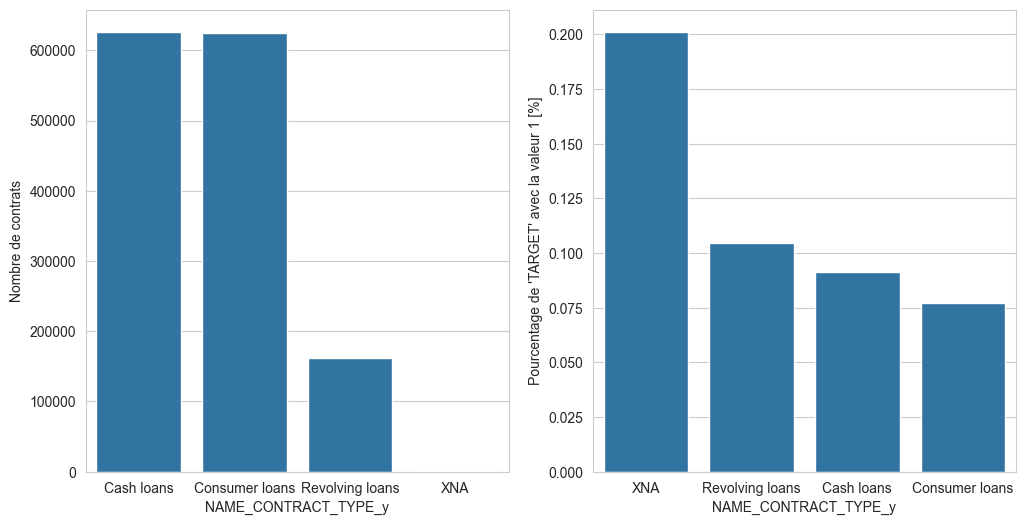

In [115]:
plot_p_stats('NAME_CONTRACT_TYPE_y')

Les données relatives aux précédentes demandes de prêt comprennent trois types de contrats : les prêts en espèces, les prêts à la consommation et les prêts renouvelables. Les prêts en espèces et les prêts à la consommation sont presque équitablement répartis, chacun totalisant environ 600 000 cas, tandis que les prêts renouvelables s'élèvent à environ 150 000 cas.

Le taux de défaut des prêts pour les clients ayant effectué des demandes de prêt précédentes varie en fonction du type de contrat de demande précédente. Il diminue d'environ 10 % pour les prêts renouvelables, passe à environ 9,5 % pour les prêts en espèces, et atteint environ 8 % pour les prêts à la consommation.

##### *Objectif du prêt en espèces*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3772144619.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3772144619.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


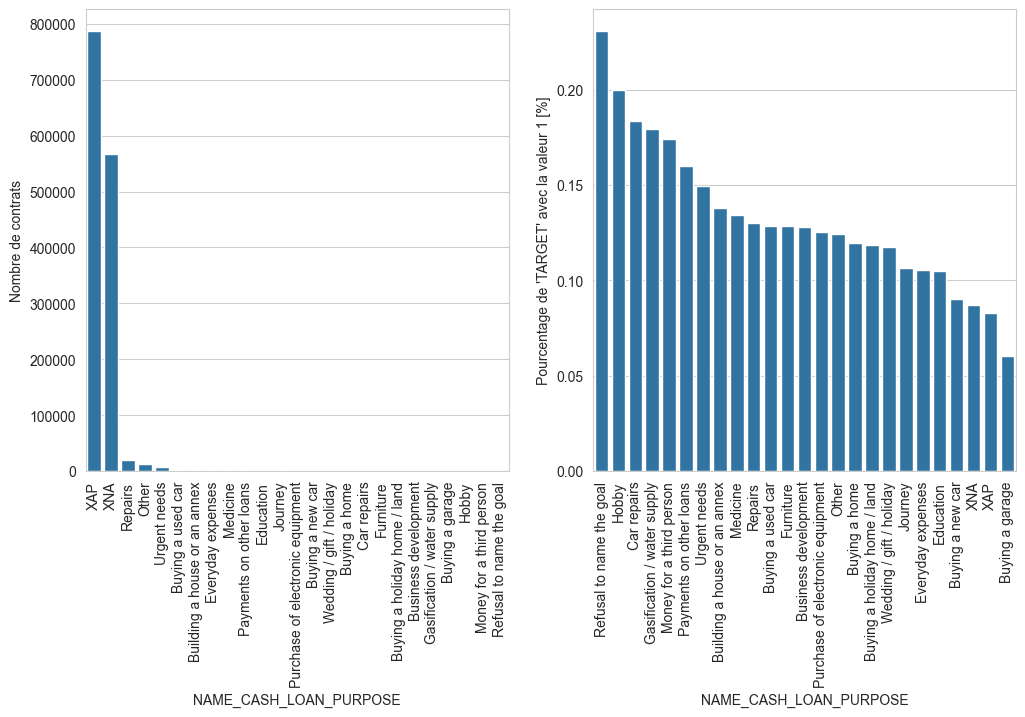

In [116]:
plot_p_stats('NAME_CASH_LOAN_PURPOSE', True, True)

Outre les catégories non identifiées ou non disponibles les catégories 'Réparations', 'Autres', 'Besoins urgents', 'Achat d'une voiture d'occasion', 'Construction d'une maison ou d'une annexe' représentent le plus grand nombre de contrats.

En ce qui concerne le pourcentage de défauts pour les demandes actuelles de l'échantillon, les clients ayant déjà fait des demandes antérieures présentent les pourcentages de défauts les plus élevés lorsque leurs demandes antérieures de prêts en espèces étaient destinées à 'Refus de nommer l'objectif' - environ 23 % (ce qui est tout à fait logique), 'Loisirs' (20 %) et 'Réparations de voiture' (environ 18 %).

##### *Statut du contrat*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3772144619.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3772144619.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


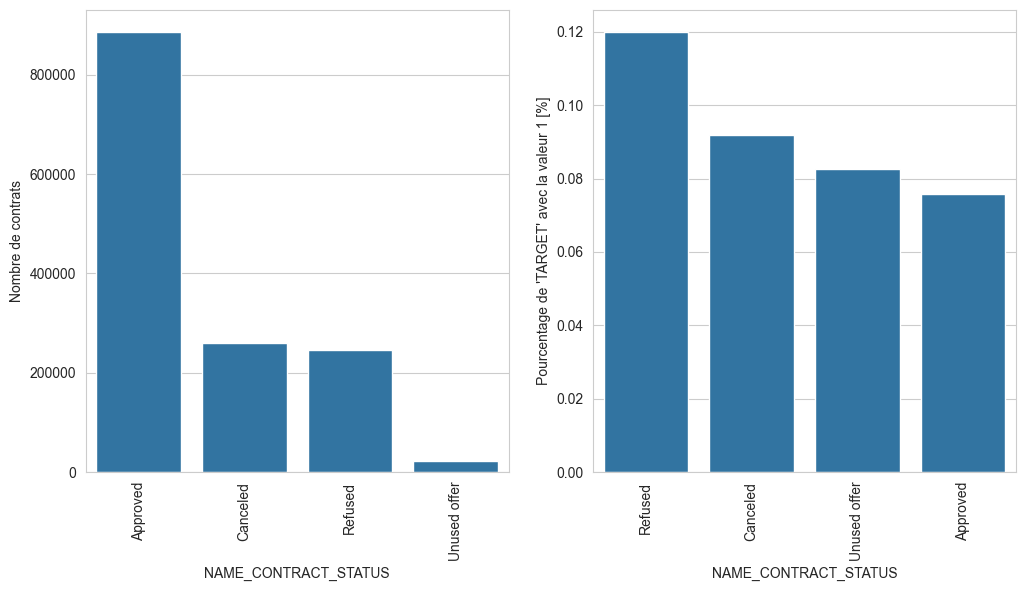

In [117]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

La plupart des statuts des contrats des demandes antérieures sont 'Approuvés' (~850 000), 'Annulés' et 'Refusés' (~240 000). Il y a seulement ~20 000 statuts 'Offre inutilisée'.

En ce qui concerne le pourcentage de défauts pour les demandes actuelles de l'échantillon, les clients ayant un historique de demandes antérieures présentent les pourcentages de défauts les plus élevés lorsque les statuts de leurs contrats antérieurs sont 'Refusés (12 %)', suivis par 'Annulés (9 %)', 'Offre inutilisée (~8 %)' et 'Approuvés' (le pourcentage le plus bas de défauts dans les demandes actuelles, avec moins de 8 %).

##### *Type de paiement*

/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3772144619.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)
/var/folders/5j/_qtnnpd97gz1009v23gz937w0000gp/T/ipykernel_14065/3772144619.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


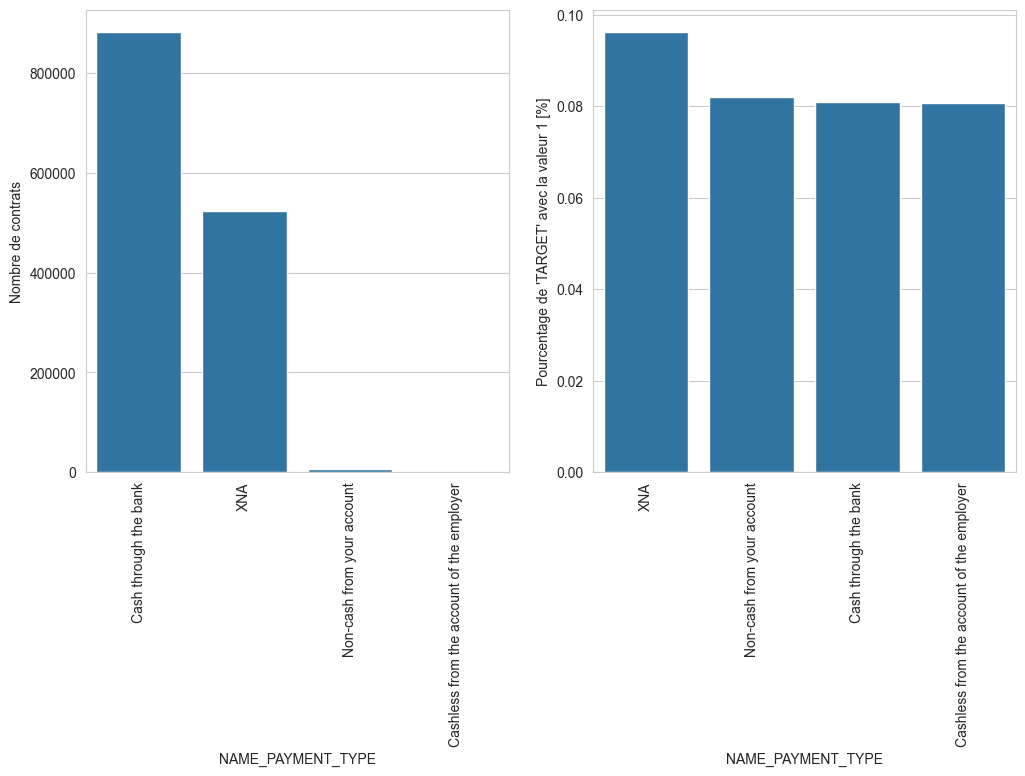

In [118]:
plot_p_stats('NAME_PAYMENT_TYPE', True, True)

La plupart des demandes antérieures ont été payées en utilisant 'De l'argent via la banque' (~850 000). Les paiements effectués via 'Non-cash de votre compte' ou 'Sans numéraire depuis le compte de l'employeur' sont beaucoup plus rares. Ces trois types de paiements dans les demandes antérieures donnent presque le même pourcentage de défauts pour les clients actuels (~8 % chacun).

##### *Type de client*

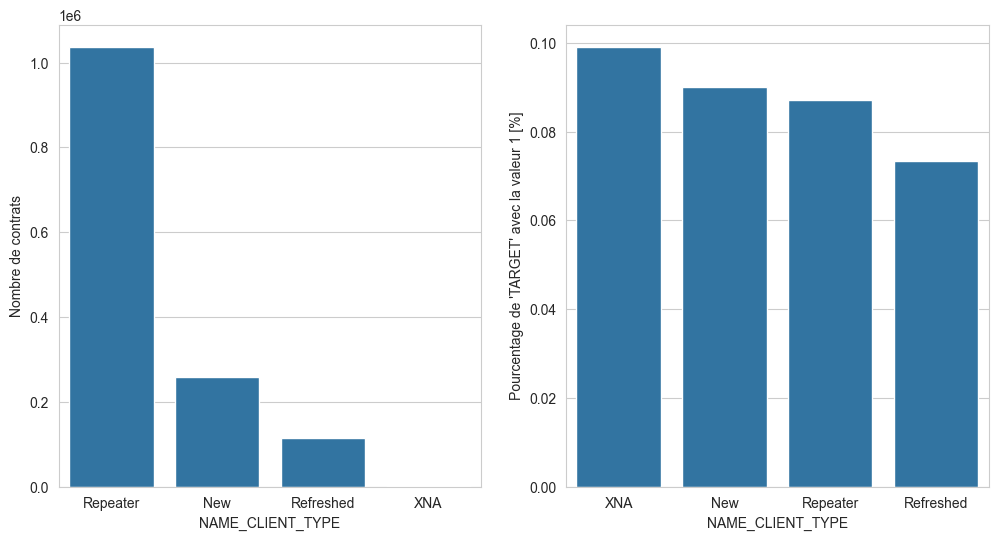

In [119]:
plot_p_stats('NAME_CLIENT_TYPE')

La majorité des demandes antérieures sont associées au type de client "Repeater" (plus d'un million), tandis que légèrement plus de 200 000 d'entre elles sont classées comme "Nouvelles" et environ 100 000 comme "Actualisées".

En ce qui concerne le pourcentage de défauts pour les demandes actuelles de clients ayant un historique de demandes antérieures, les clients actuels présentent des taux de défaut variant de 8,5 %, 8,25 % et 7 %, correspondant respectivement aux types de clients antérieurs "Nouveaux", "Repeater" et "Actualisés".

#### E) Etude des corrélations des features

In [120]:
application_train['TARGET'] = application_train['TARGET'].astype('float')

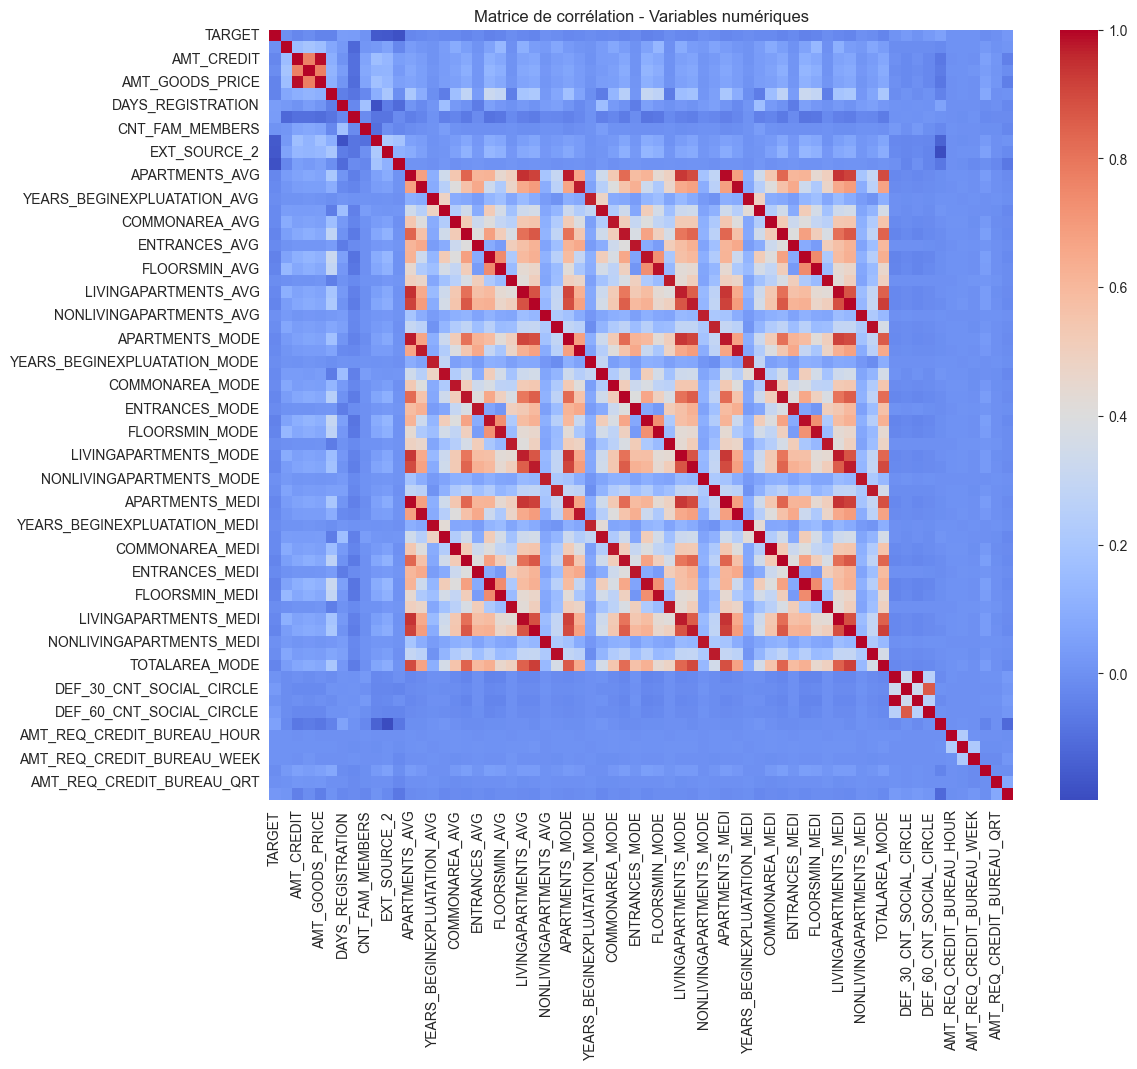

In [121]:
# Inclure la variable "TARGET" dans le DataFrame des données numériques
numeric_data = application_train.select_dtypes(include='float')

# Créer une matrice de corrélation
correlation_matrix = numeric_data.corr()

# Créer une heatmap pour visualiser la corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation - Variables numériques')
plt.show()


Potentiellement A intégrer : 
previous_application["NAME_GOODS_CATEGORY"]
previous_application["CHANNEL_TYPE"]
previous_application["PRODUCT_COMBINATION"]
previous_application["NFLAG_INSURED_ON_APPROVAL"]